# Full Pipeline Test [Work-In-Progress]

- Create & Configure DynapSE1NeuronSynapseJax object
- Test if it's compatible with just-in-time compilation
- Test differentiability

In [1]:
from rockpool import (
    TSEvent,
    TSContinuous,
)

from rockpool.devices.dynapse import (
    DynapSE1NeuronSynapseJax,
    DynapSE1Layout,
    DPIParameters,
    SynapseParameters,
    FeedbackParameters,
    MembraneParameters,
    AHPParameters,
    NMDAParameters,
    AMPAParameters,
    GABAAParameters,
    GABABParameters,
    DynapSE1SimulationConfiguration,
    random_spike_train,
    step_pwl,
)

import numpy as np
import jax.numpy as jnp

# - Plotting imports and config
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

/home/ugurc/anaconda3/envs/synsense/lib/python3.8/site-packages/samna
finished bindings


In [2]:
# layout?

layout = DynapSE1Layout(
    kappa_n=0.75, 
    kappa_p=0.66, 
    Ut=0.025, 
    Io=5e-13
)

print(layout)

DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13)


In [3]:
# feedback?

feedback = FeedbackParameters(
    Igain=5e-11, 
    Ith=5e-10, 
    Inorm=1e-11
)

print(feedback)

FeedbackParameters(Igain=5e-11, Ith=5e-10, Inorm=1e-11)


In [4]:
# DPIParameters?
# MembraneParameters?

mem = MembraneParameters(
    Itau=None, # Deduce from tau & layout 
    f_gain=4, 
    C=3.2e-12, 
    tau=1e-2,
    layout=layout,
    Imem=None, # Set to dark current Io
    feedback=feedback,
)

print(mem)

MembraneParameters(Itau=1.1347517730496453e-11, f_gain=4, C=3.2e-12, tau=0.01, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Imem=5e-13, feedback=FeedbackParameters(Igain=5e-11, Ith=5e-10, Inorm=1e-11))


In [5]:
# DPIParameters?
# SynapseParameters?
# AHPParameters?

ahp = AHPParameters(
    Itau=1e-11, 
    f_gain=4, 
    C=4e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

assert ahp == AHPParameters()

print(ahp)

AHPParameters(Itau=1e-11, f_gain=4, C=4e-11, tau=0.14184397163120566, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [6]:
# DPIParameters?
# SynapseParameters?
# NMDAParameters?

nmda = NMDAParameters(
    Itau=1e-11, 
    f_gain=4, 
    C=2.8e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

assert nmda == NMDAParameters()

print(nmda)

NMDAParameters(Itau=1e-11, f_gain=4, C=2.8e-11, tau=0.09929078014184398, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [7]:
ampa = AMPAParameters(
    Itau=1e-11, 
    f_gain=4, 
    C=2.8e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

assert ampa == AMPAParameters()

print(ampa)

AMPAParameters(Itau=1e-11, f_gain=4, C=2.8e-11, tau=0.09929078014184398, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [8]:
gaba_a = GABAAParameters(
    Itau=1e-11, 
    f_gain=4, 
    C=2.7e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=0, # Deactivate the block 
    Isyn=None, # Set to dark current Io
)

assert gaba_a == GABAAParameters()

print(gaba_a)

GABAAParameters(Itau=1e-11, f_gain=4, C=2.7e-11, tau=0.09574468085106383, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=0, Isyn=5e-13)


In [9]:
gaba_b = GABABParameters(
    Itau=1e-11, 
    f_gain=4, 
    C=2.7e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=0, # Deactivate the block 
    Isyn=None, # Set to dark current Io
)

assert gaba_b == GABABParameters()

print(gaba_b)

GABABParameters(Itau=1e-11, f_gain=4, C=2.7e-11, tau=0.09574468085106383, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=0, Isyn=5e-13)


In [10]:
# DynapSE1Parameters?

sim_config = DynapSE1SimulationConfiguration(
    t_ref = 15e-3,
    t_pulse = 1e-5,
    fpulse_ahp = 0.1,
    Ispkthr = 1e-9,
    Ireset = None, # Set to dark current Io
    Idc = None, # Set to dark current Io
    If_nmda = None, # Set to dark current Io
    layout = layout,
    mem = mem,
    ahp = ahp,
    nmda = nmda,
    ampa = ampa,
    gaba_a = gaba_a,
    gaba_b = gaba_b,
)

print(sim_config)

DynapSE1SimulationConfiguration(t_ref=0.015, t_pulse=1e-05, fpulse_ahp=0.1, Ispkthr=1e-09, Ireset=5e-13, Idc=5e-13, If_nmda=5e-13, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), mem=MembraneParameters(Itau=1.1347517730496453e-11, f_gain=4, C=3.2e-12, tau=0.01, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Imem=5e-13, feedback=FeedbackParameters(Igain=5e-11, Ith=5e-10, Inorm=1e-11)), ahp=AHPParameters(Itau=1e-11, f_gain=4, C=4e-11, tau=0.14184397163120566, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13), nmda=NMDAParameters(Itau=1e-11, f_gain=4, C=2.8e-11, tau=0.09929078014184398, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13), ampa=AMPAParameters(Itau=1e-11, f_gain=4, C=2.8e-11, tau=0.09929078014184398, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13), gaba_a=GABAAParameters(Itau=1e-11, f_gain=4, C=2.7e-1

In [11]:
# DynapSE1NeuronSynapseJax?

N = 12 # number of neurons
dt = 1e-3 # simulation time resolution

modSE = DynapSE1NeuronSynapseJax(
    shape=(N,),
    sim_config=sim_config,
    dt=dt,
    rng_key=None, # Set randomly
    spiking_input=True,
    spiking_output=True,
)

print(modSE)

DynapSE1NeuronSynapseJax  with shape (12,)


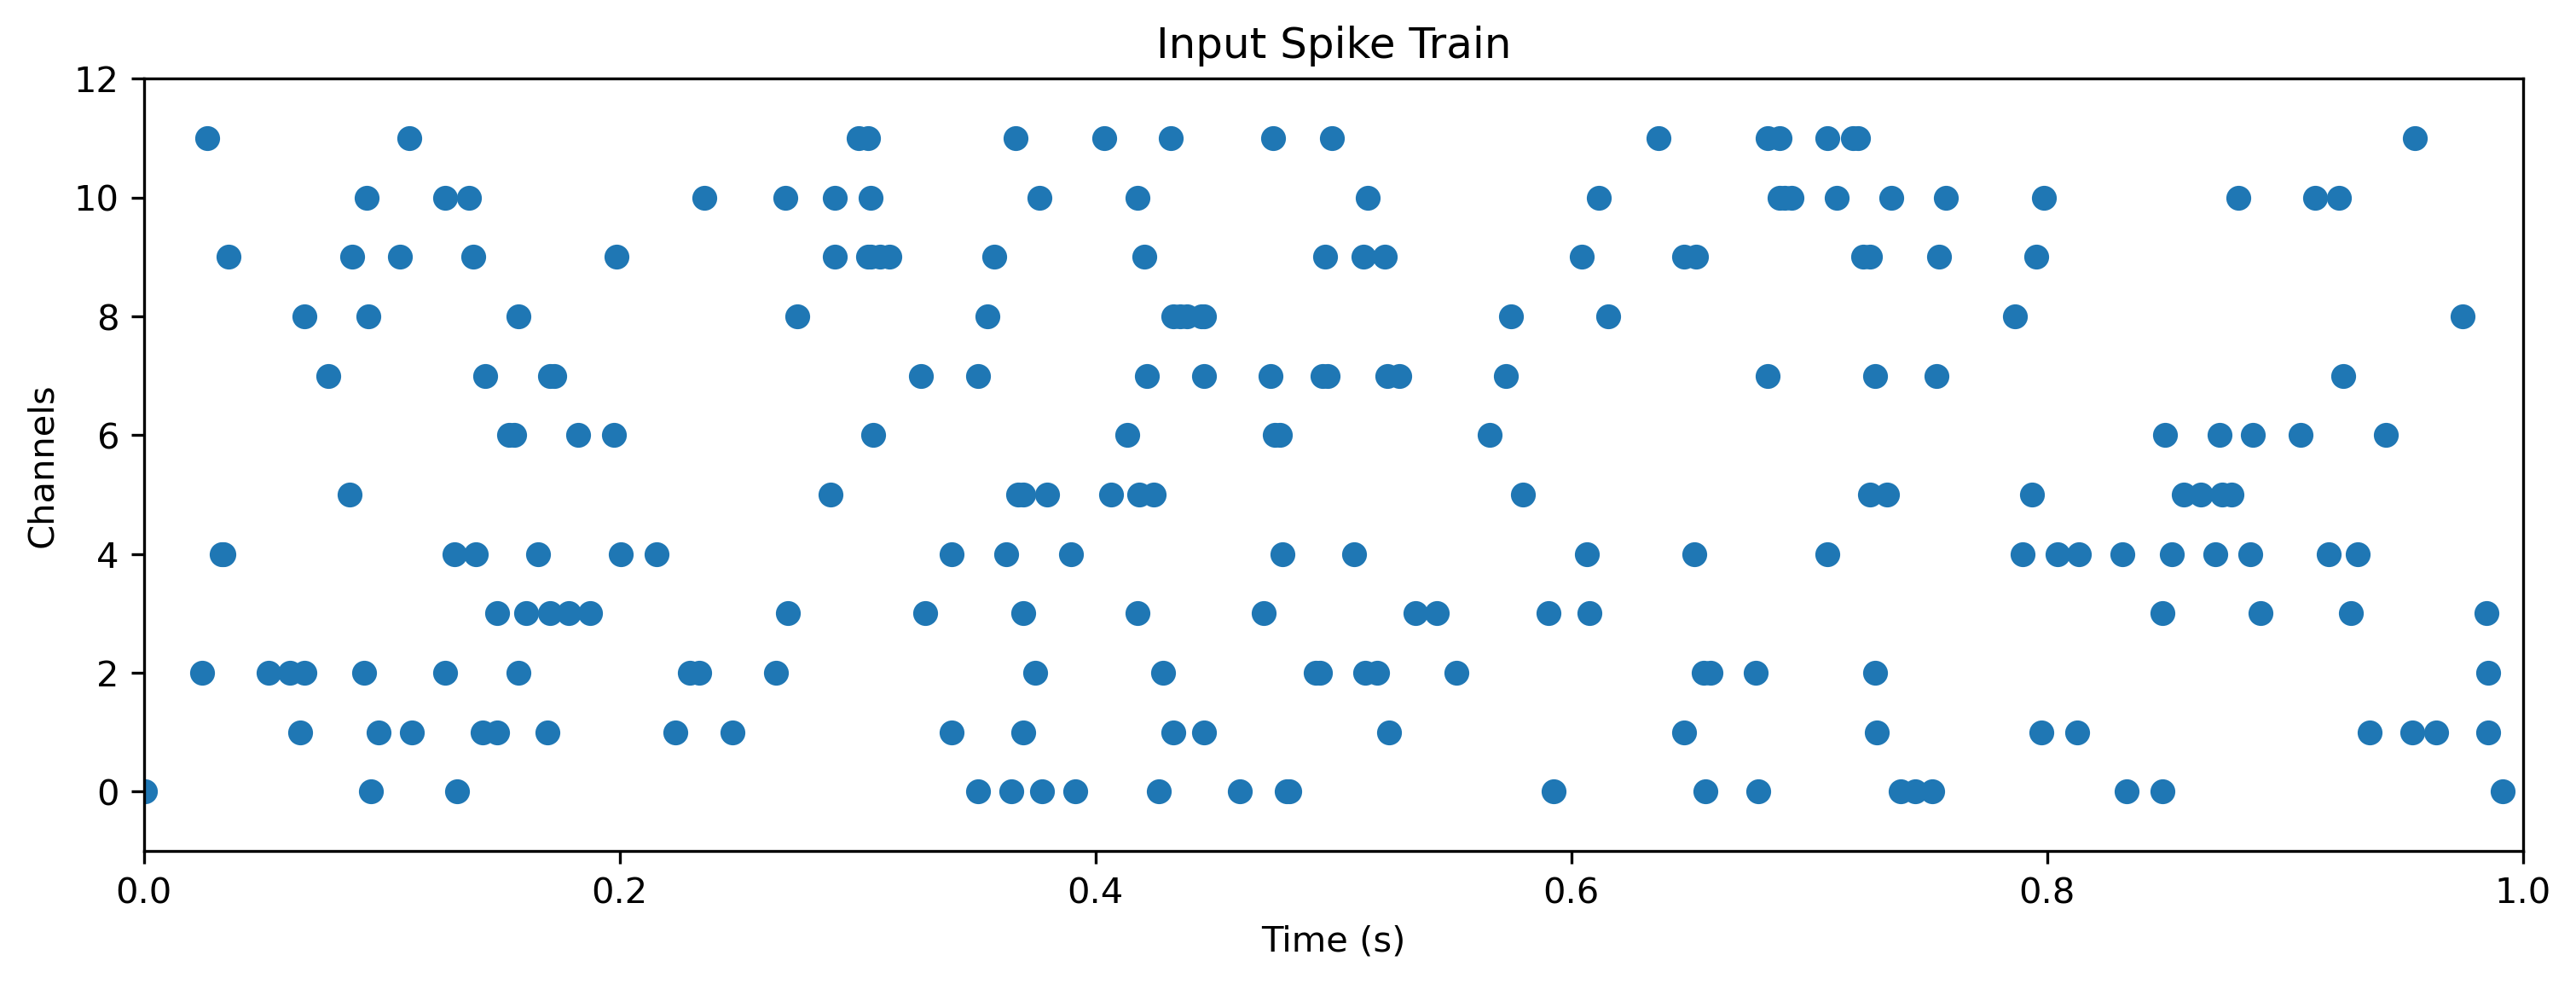

In [12]:
# random_spike_train?

T = 1 # duration in seconds
rate = 20 # firing rate in Hertz

input_ts = random_spike_train(
    duration=T,
    n_channels=N,
    rate=rate,
    dt=dt,
    name='Input Spike Train',
)

input_ts.plot();

In [13]:
# %%timeit
out_spikes, new_state, record_dict = modSE(input_ts.raster(dt = dt))

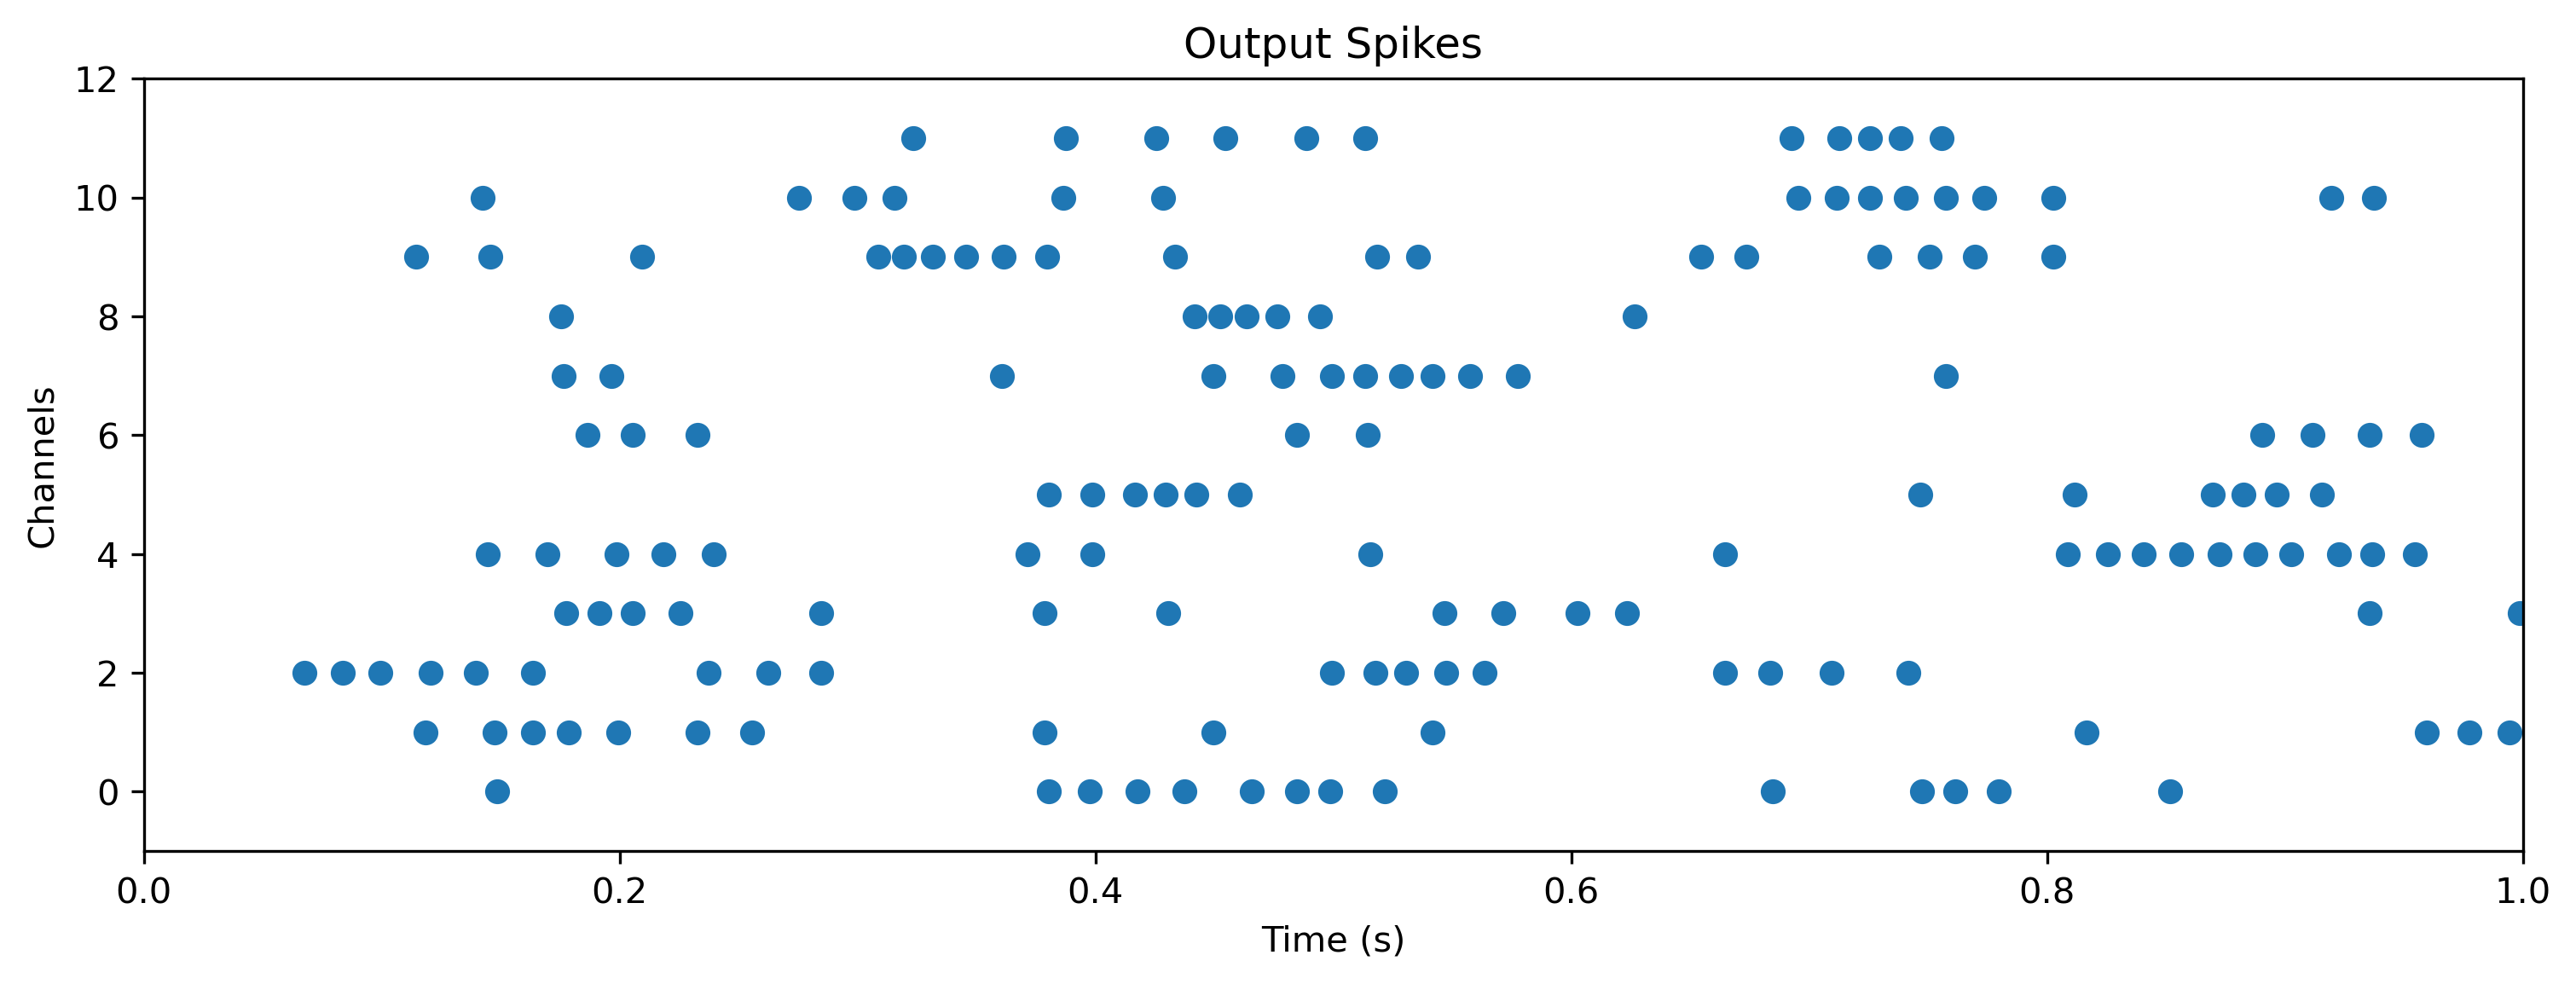

In [14]:
def plot_out(output_spikes, name="Output Spikes"):

    out = TSEvent.from_raster(
        output_spikes, 
        dt=dt, 
        name=name
    )

    out.plot();
    return out

out = plot_out(out_spikes);

In [15]:
new_state

{'_rng_key': DeviceArray([1192234812, 1613354198], dtype=uint32),
 'Imem': DeviceArray([3.1503777e-10, 7.1822534e-11, 2.0590889e-10, 1.1148108e-12,
              3.3721931e-10, 2.4742283e-10, 3.3871689e-10, 1.9001564e-10,
              2.5178745e-10, 8.1502444e-11, 3.1654238e-10, 2.3182413e-10],            dtype=float32),
 'Isyn': DeviceArray([[6.7434031e-11, 1.2553988e-10, 4.3577565e-11, 7.8982453e-11,
               9.9861307e-11, 5.4636354e-11, 7.2617551e-11, 2.8911373e-11,
               3.8259534e-11, 1.8023517e-11, 6.8116596e-11, 3.7822221e-11],
              [5.0000000e-13, 5.0000000e-13, 5.0000000e-13, 5.0000000e-13,
               5.0000000e-13, 5.0000000e-13, 5.0000000e-13, 5.0000000e-13,
               5.0000000e-13, 5.0000000e-13, 5.0000000e-13, 5.0000000e-13],
              [5.0000000e-13, 5.0000000e-13, 5.0000000e-13, 5.0000000e-13,
               5.0000000e-13, 5.0000000e-13, 5.0000000e-13, 5.0000000e-13,
               5.0000000e-13, 5.0000000e-13, 5.0000000e-13, 5.0000

In [16]:
# Should be initial values
modSE.state()

{'_rng_key': array([1192234812, 1613354198], dtype=uint32),
 'Imem': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
              5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13], dtype=float32),
 'Isyn': DeviceArray([[5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13],
              [5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13],
              [5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13],
              [5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13],
              [5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
               5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13]], dtype=float32),
 'spikes': DeviceArray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)}

In [17]:
# Order is also important
assert modSE.state().keys() == new_state.keys()

In [18]:
record_dict.keys()

dict_keys(['input_data', 'spikes', 'Imem', 'Iahp', 'Inmda', 'Iampa', 'Igaba_a', 'Igaba_b'])

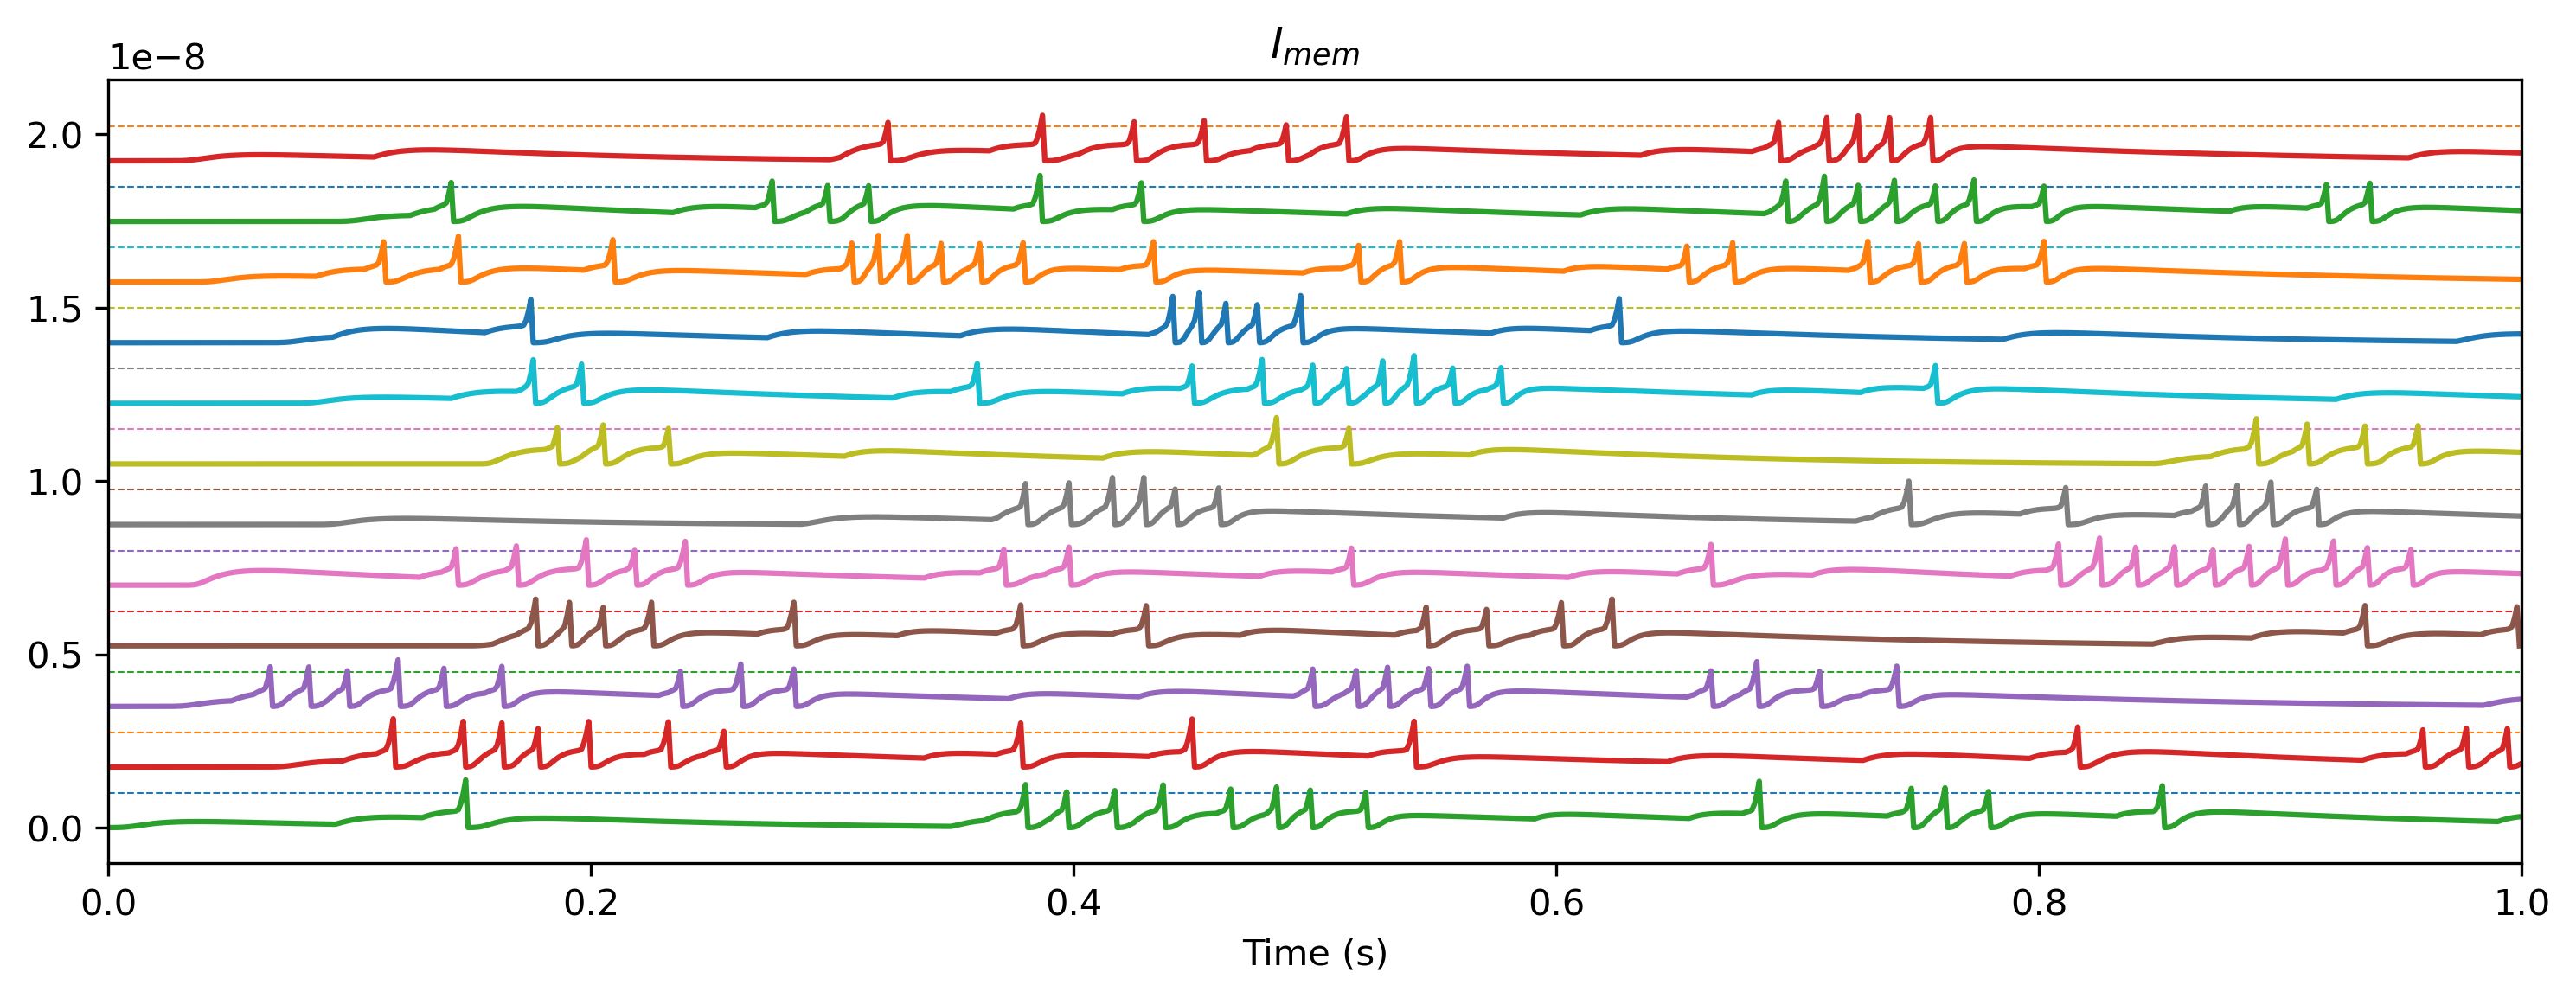

In [19]:
def plot_Imem(Imem_rec, Ispkthr=None, name="$I_{mem}$"):
    Imem = TSContinuous.from_clocked(
        Imem_rec, 
        dt=dt, 
        name=name
    )

    if Ispkthr is not None:
        Ispkthr = np.ones_like(record_dict["Imem"]) * Ispkthr
        Ispkthr = TSContinuous.from_clocked(
            Ispkthr, 
            dt=dt,
        )
        Ispkthr.plot(stagger = Imem.max*1.2, linestyle="dashed", linewidth=.5);

    Imem.plot(stagger = Imem.max*1.2);    
    return Imem, Ispkthr

Imem, Ispkthr = plot_Imem(record_dict["Imem"], modSE.Ispkthr)

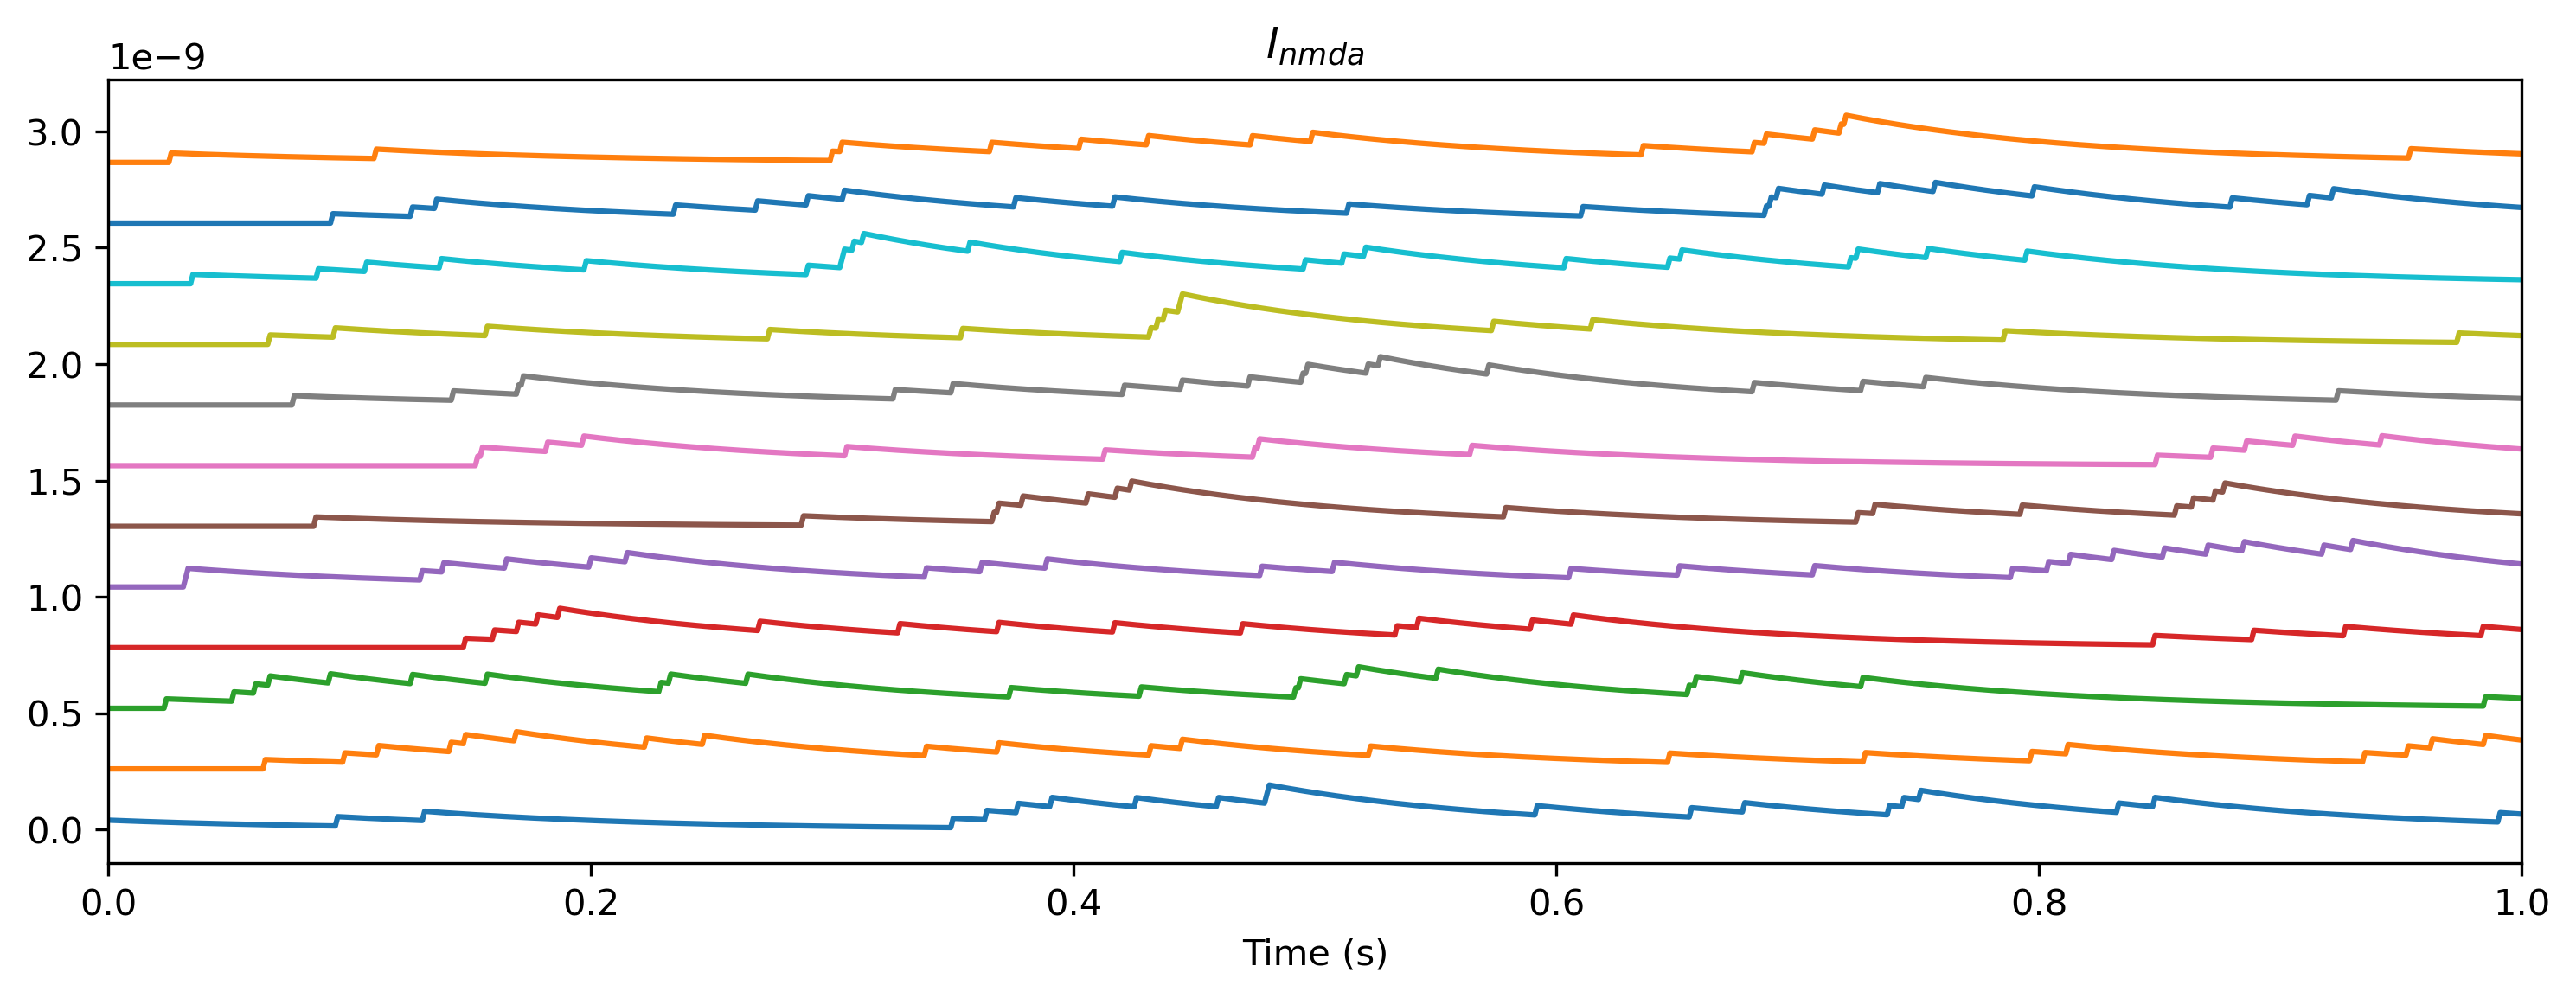

In [20]:
def plot_Isyn(Isyn_rec, name="$I_{syn}$"):
    Isyn = TSContinuous.from_clocked(
        Isyn_rec, 
        dt=dt, 
        name=name
    )

    Isyn.plot(stagger = Isyn.max*1.2);
    
    return Isyn

Isyn = plot_Isyn(record_dict["Inmda"], "$I_{nmda}$")

In [21]:
modSE.parameters()

{'Itau_mem': DeviceArray([1.13475175e-11, 1.13475175e-11, 1.13475175e-11,
              1.13475175e-11, 1.13475175e-11, 1.13475175e-11,
              1.13475175e-11, 1.13475175e-11, 1.13475175e-11,
              1.13475175e-11, 1.13475175e-11, 1.13475175e-11],            dtype=float32),
 'f_gain_mem': DeviceArray([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.], dtype=float32),
 'Itau_syn': DeviceArray([[1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11,
               1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11],
              [1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11,
               1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11],
              [1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11,
               1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11],
              [1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11,
               1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11],
              [1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11,
               1.e-11, 1.e-1

In [22]:
modSE.simulation_parameters()

{'dt': 0.001,
 'Io': 5e-13,
 'f_tau_mem': 1.1347517730496453e-13,
 'f_tau_syn': DeviceArray([9.9290780e-13, 9.5744680e-13, 9.5744680e-13, 9.9290780e-13,
              1.4184397e-12], dtype=float32),
 't_pulse': 1e-05,
 't_pulse_ahp': 1.0000000000000002e-06,
 'Idc': 5e-13,
 'If_nmda': 5e-13,
 't_ref': 0.015,
 'Ispkthr': DeviceArray([1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09,
              1.e-09, 1.e-09, 1.e-09, 1.e-09, 1.e-09], dtype=float32),
 'Ireset': DeviceArray([5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13,
              5.e-13, 5.e-13, 5.e-13, 5.e-13, 5.e-13], dtype=float32)}

In [23]:
# modSE.tau_syn?
modSE.tau_syn

DeviceArray([[0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397],
             [0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397],
             [0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397],
             [0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397],
             [0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397],
             [0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397],
             [0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397],
             [0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397],
             [0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397],
             [0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397],
             [0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397],
             [0.09929078, 0.09574468, 0.09574468, 0.09929078, 0.14184397]],            dtype=float32)

In [24]:
modSE.tau_ampa

DeviceArray([0.09929078, 0.09929078, 0.09929078, 0.09929078, 0.09929078,
             0.09929078, 0.09929078, 0.09929078, 0.09929078, 0.09929078,
             0.09929078, 0.09929078], dtype=float32)

In [25]:
modSE.tau_gaba_a

DeviceArray([0.09574468, 0.09574468, 0.09574468, 0.09574468, 0.09574468,
             0.09574468, 0.09574468, 0.09574468, 0.09574468, 0.09574468,
             0.09574468, 0.09574468], dtype=float32)

In [26]:
# modSE.tau_mem?
modSE.tau_mem

DeviceArray([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
             0.01, 0.01], dtype=float32)

In [27]:
print(modSE.IF_AHTAU_N)
print(modSE.Itau_syn[6].mean())
from rockpool.devices.dynapse import BiasGen

BiasGen.get_bias(2,3)

1e-11


9.647058968658271e-12

In [28]:
import jax

In [29]:
j_modSE = jax.jit(modSE)

In [30]:
# %%timeit
j_out_spikes, j_new_state, j_record_dict = j_modSE(input_ts.raster(dt = dt))

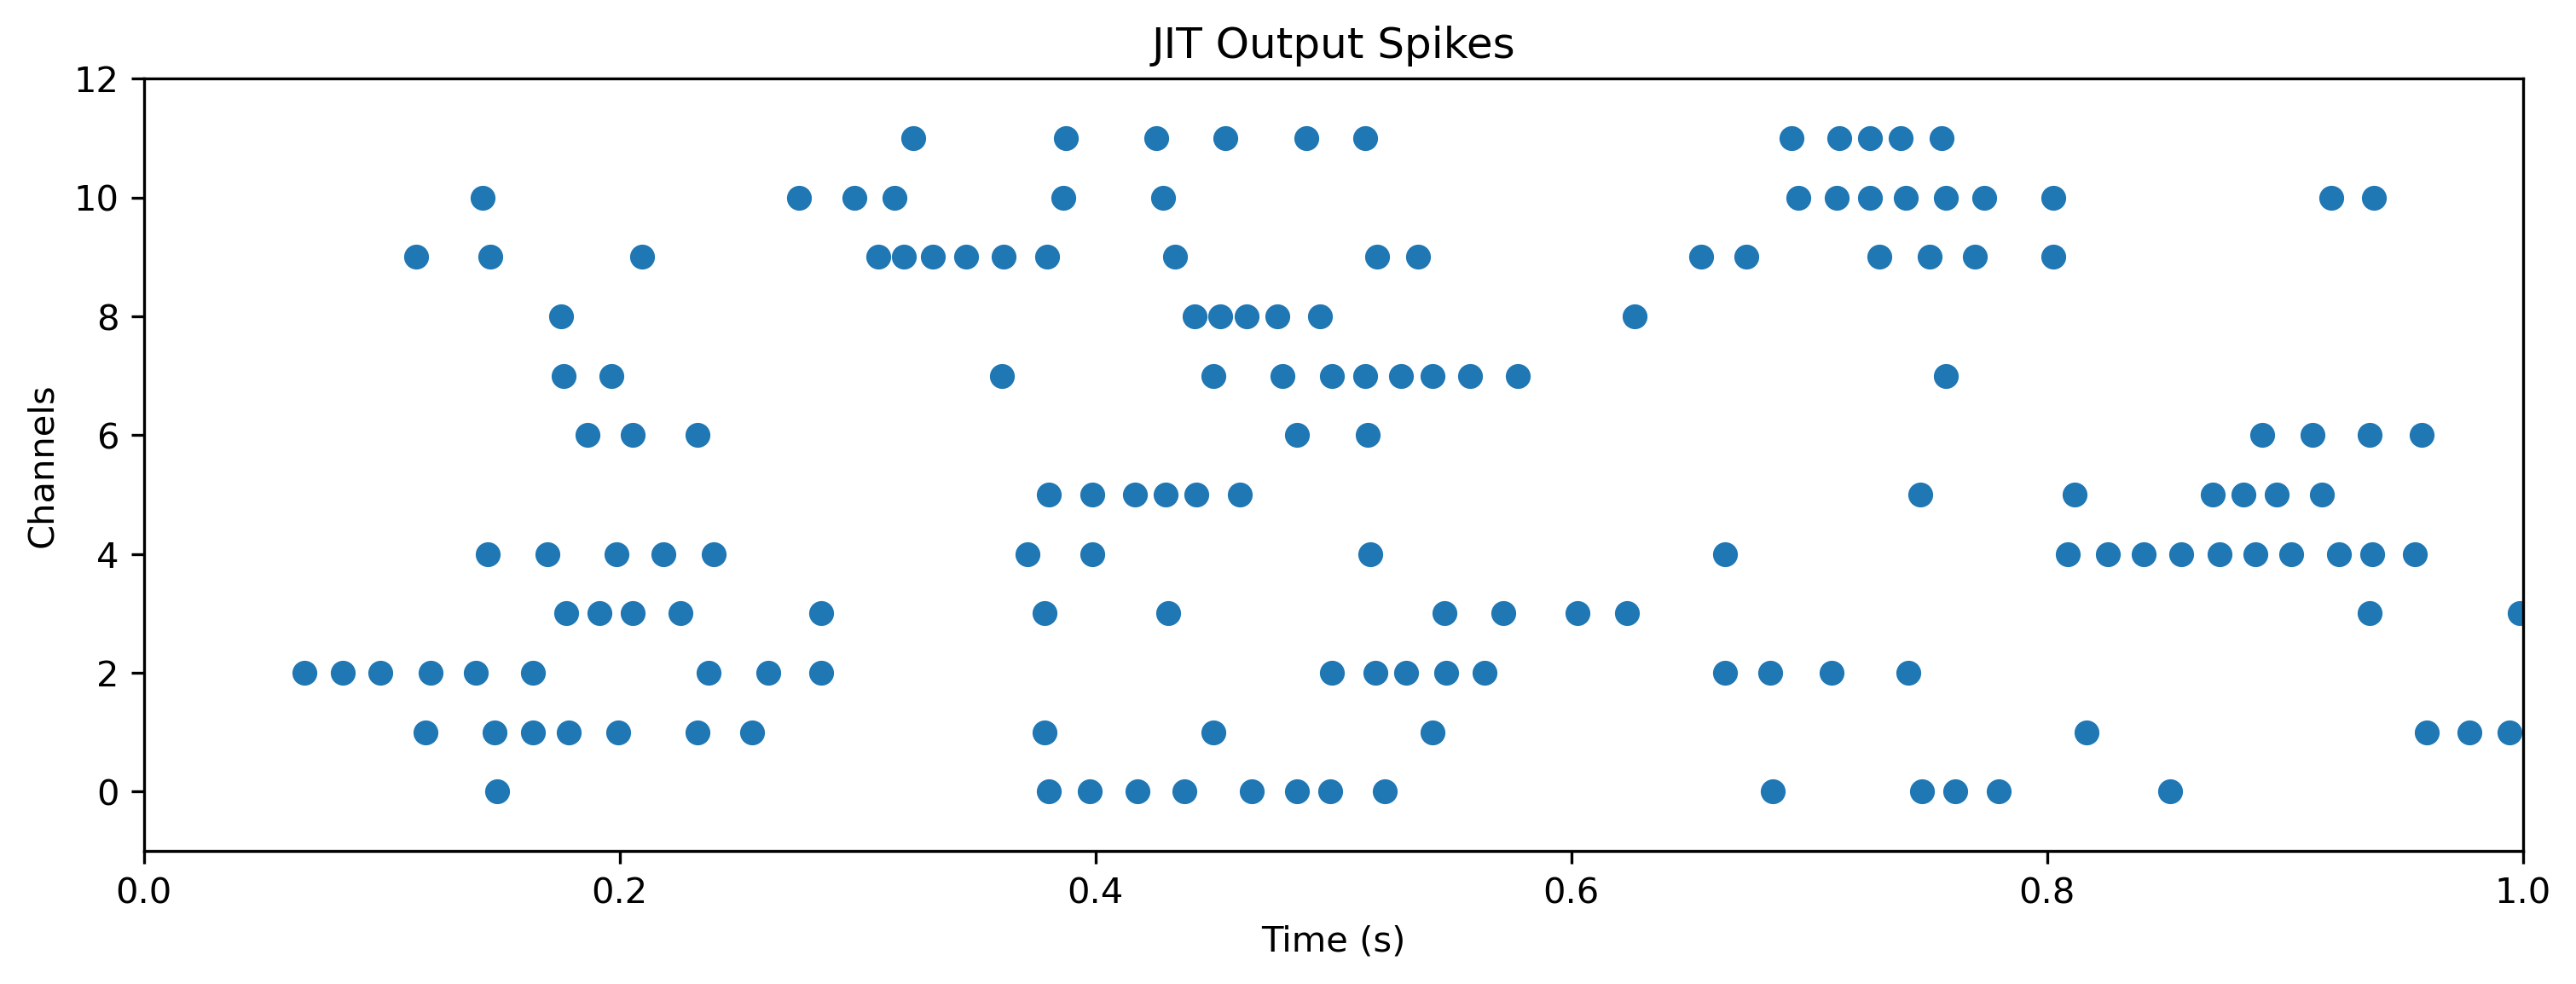

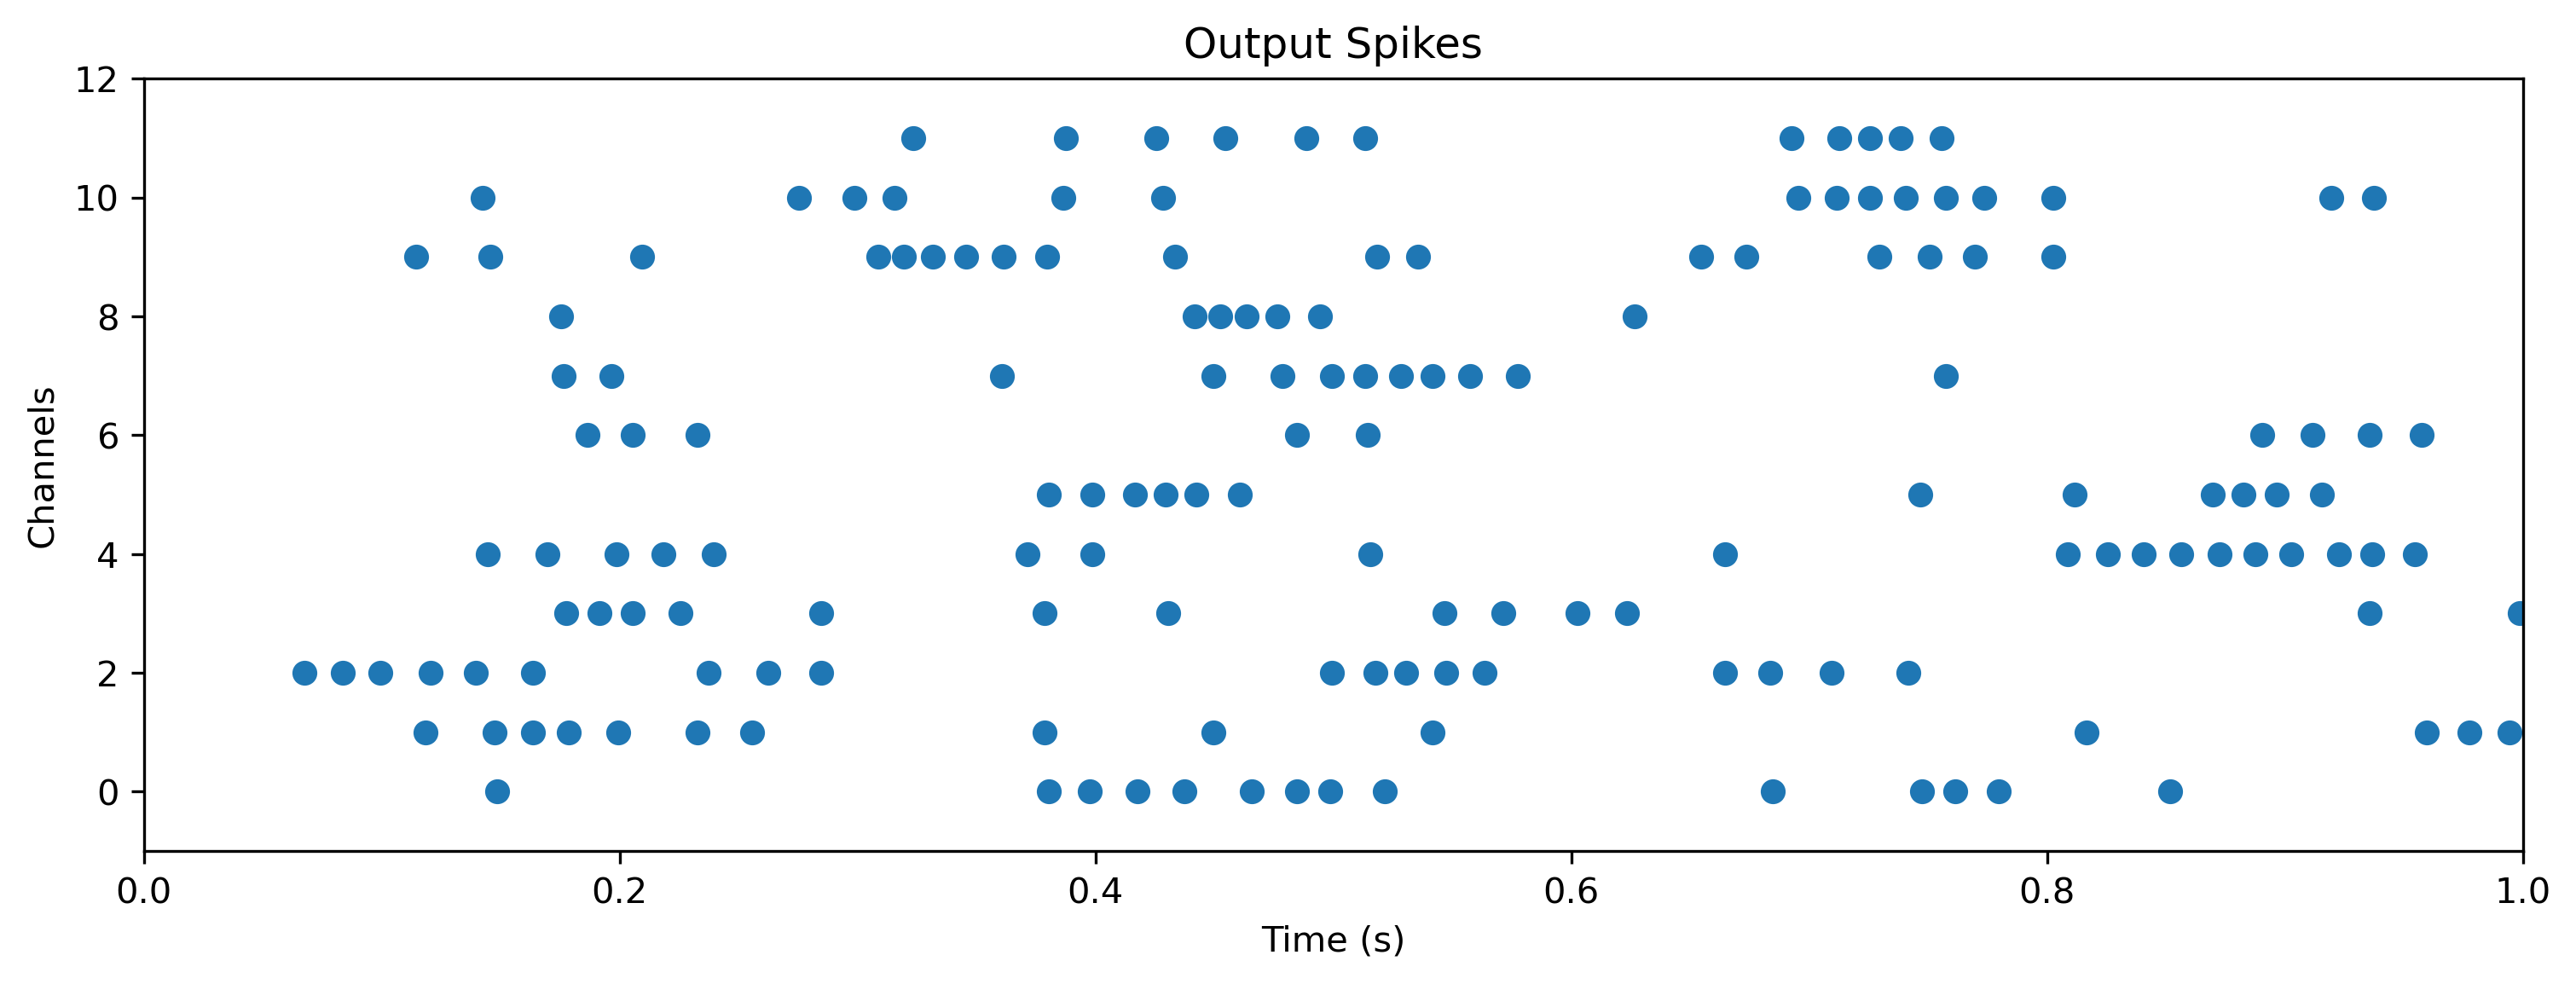

In [31]:
j_out = plot_out(j_out_spikes, name="JIT Output Spikes")
plt.figure()
out = plot_out(out_spikes)
np.testing.assert_array_equal(out.times, j_out.times)

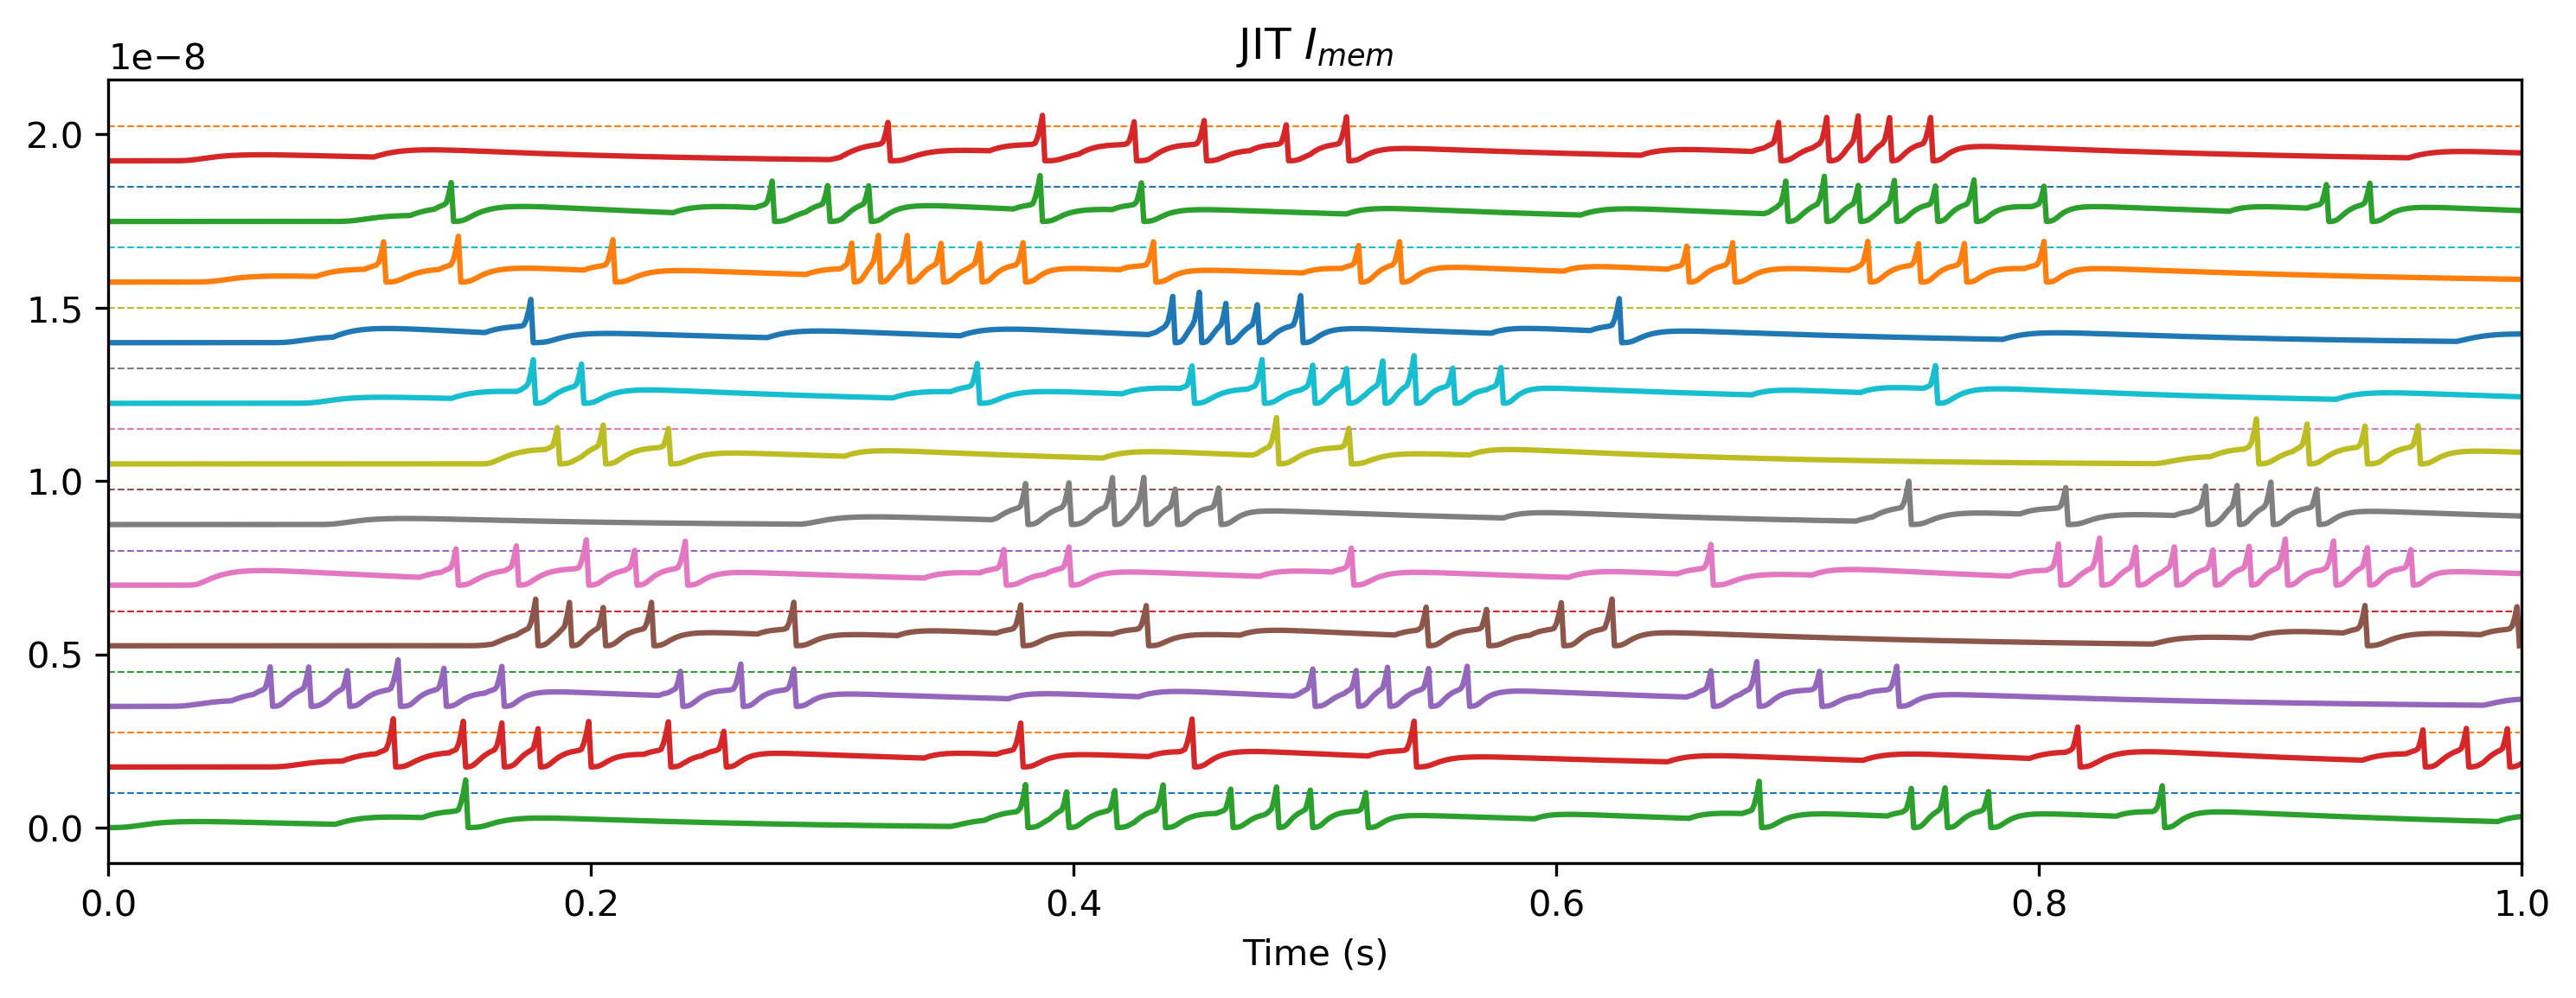

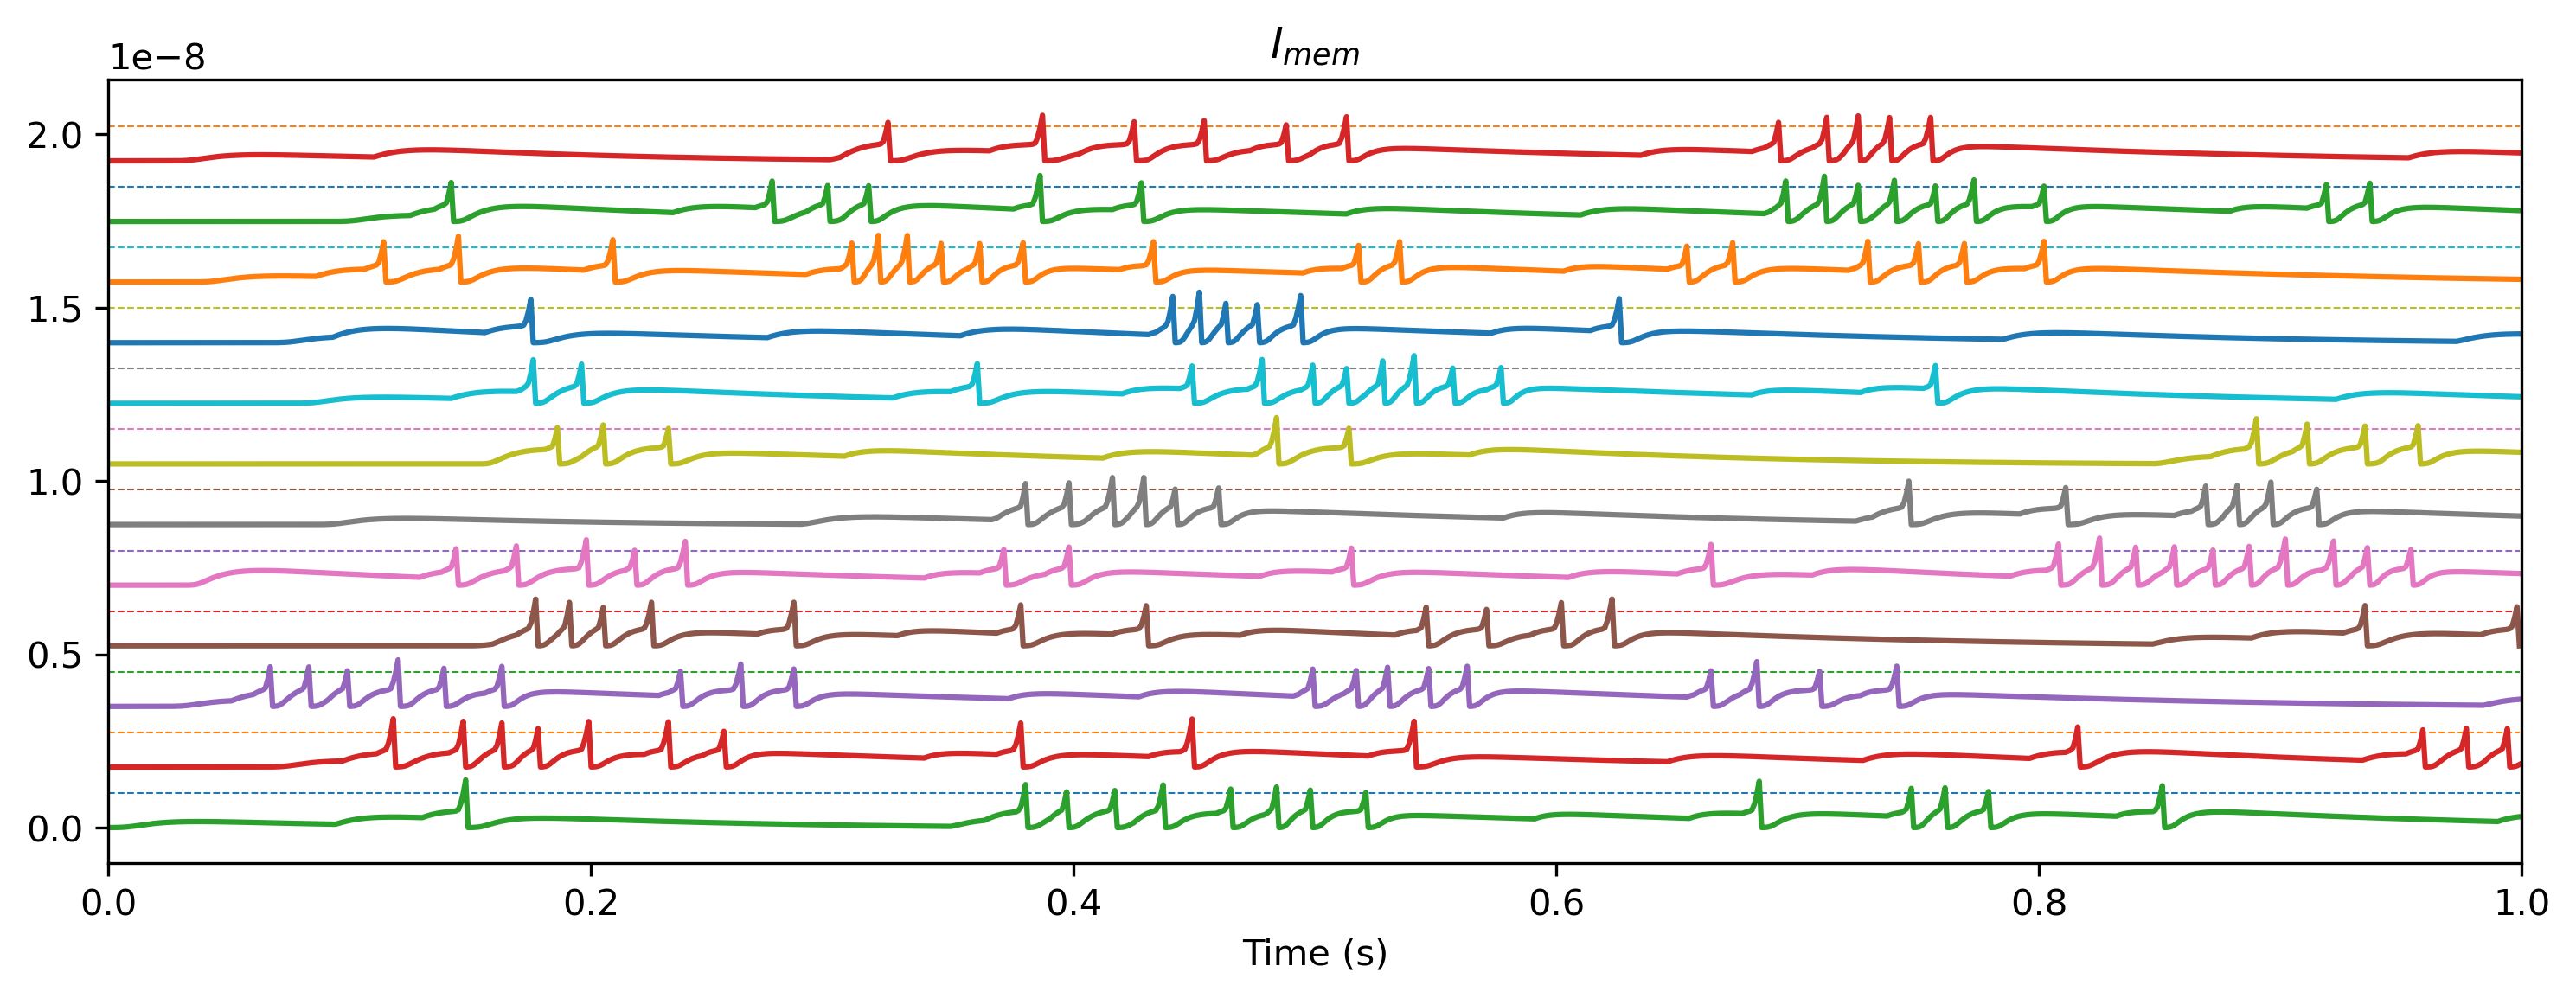

In [32]:
j_Imem, j_Ispk_thr = plot_Imem(j_record_dict["Imem"], j_modSE.Ispkthr, name="JIT $I_{mem}$")

plt.figure()
Imem, Ispkthr = plot_Imem(record_dict["Imem"], modSE.Ispkthr)
np.testing.assert_array_equal(Imem.times, j_Imem.times)

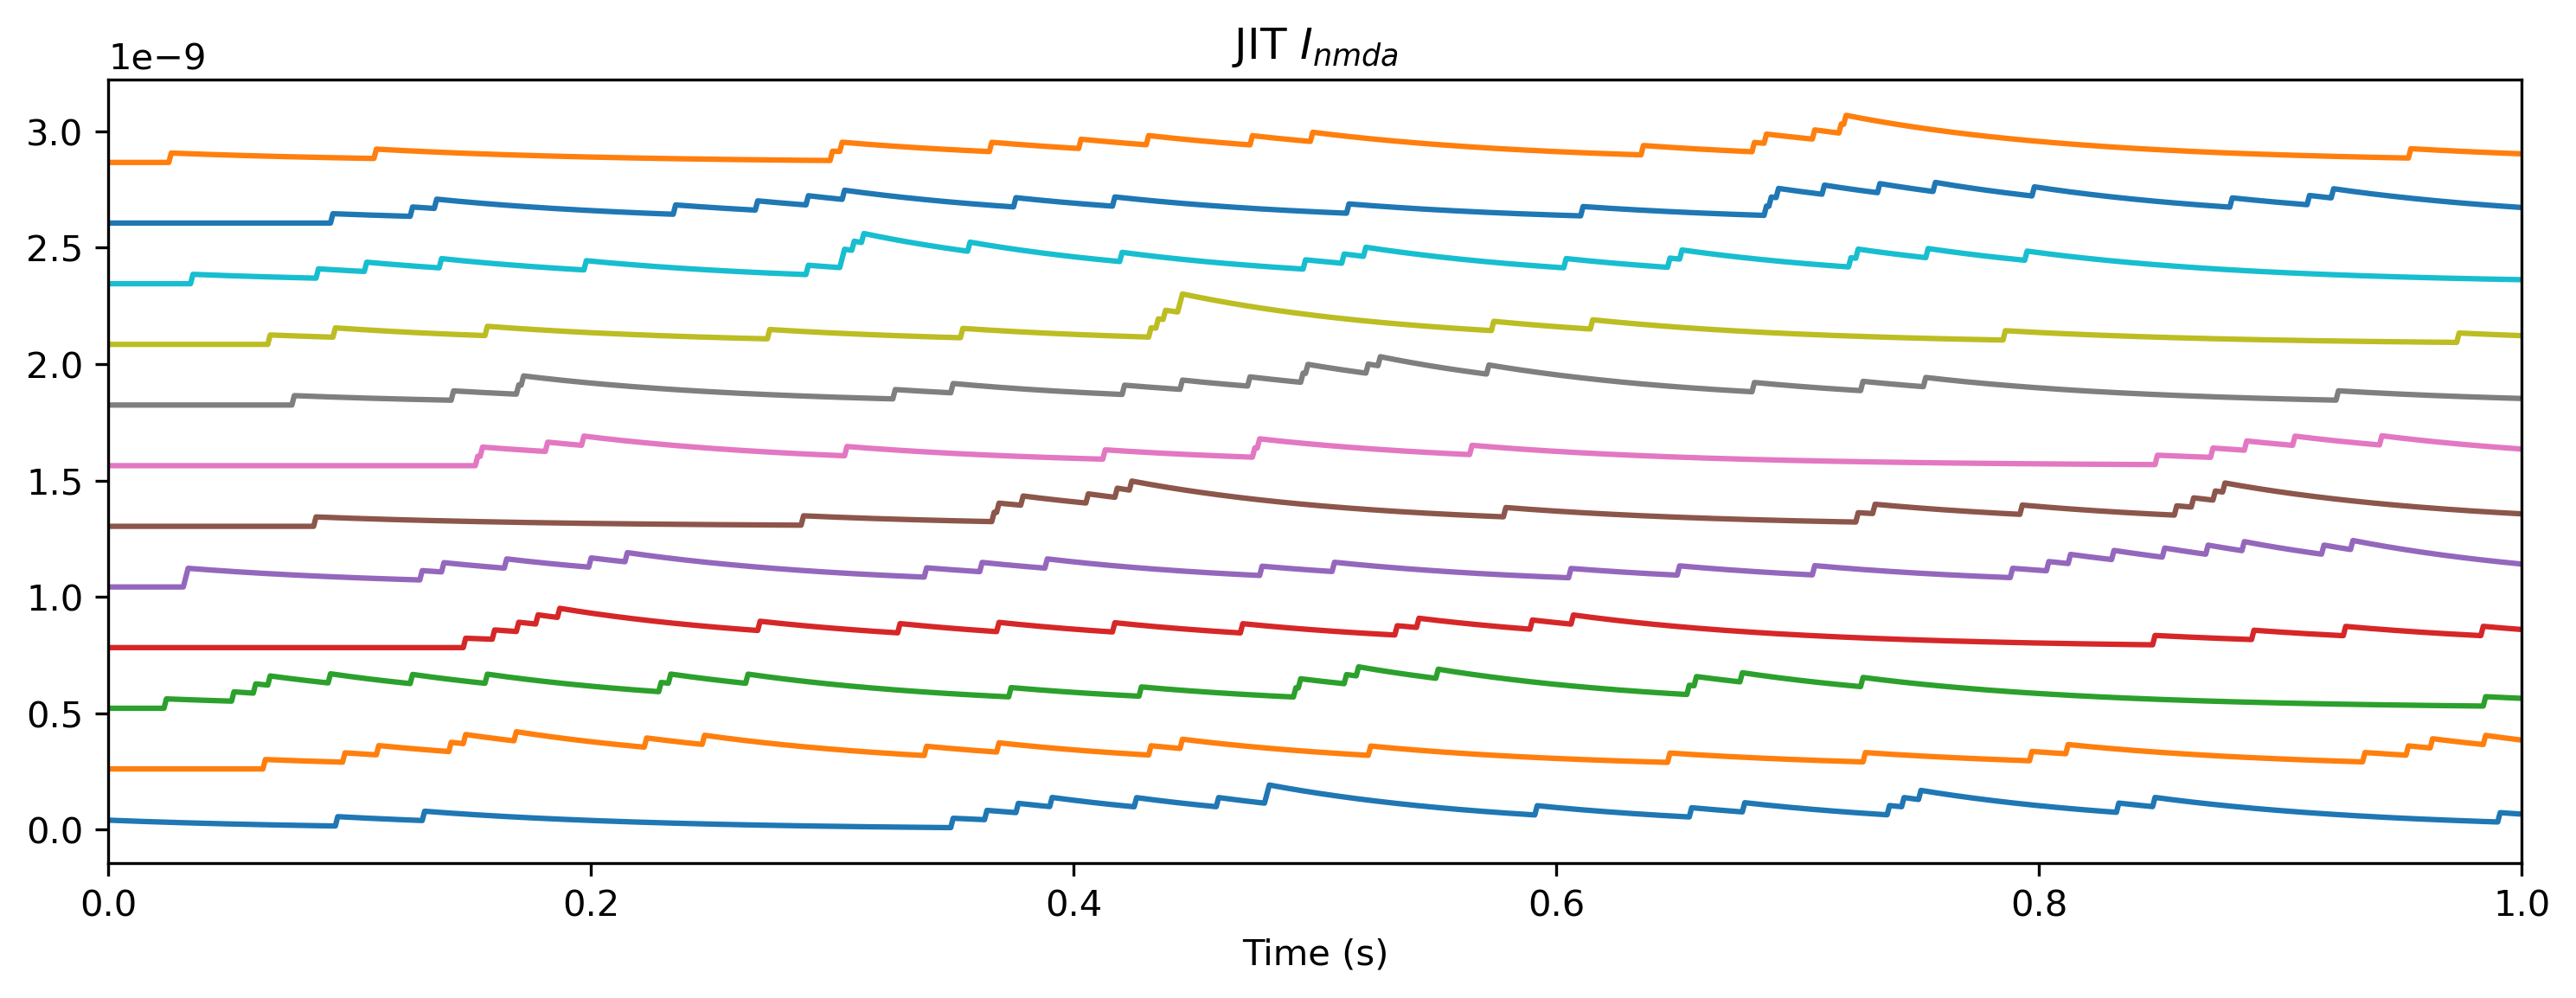

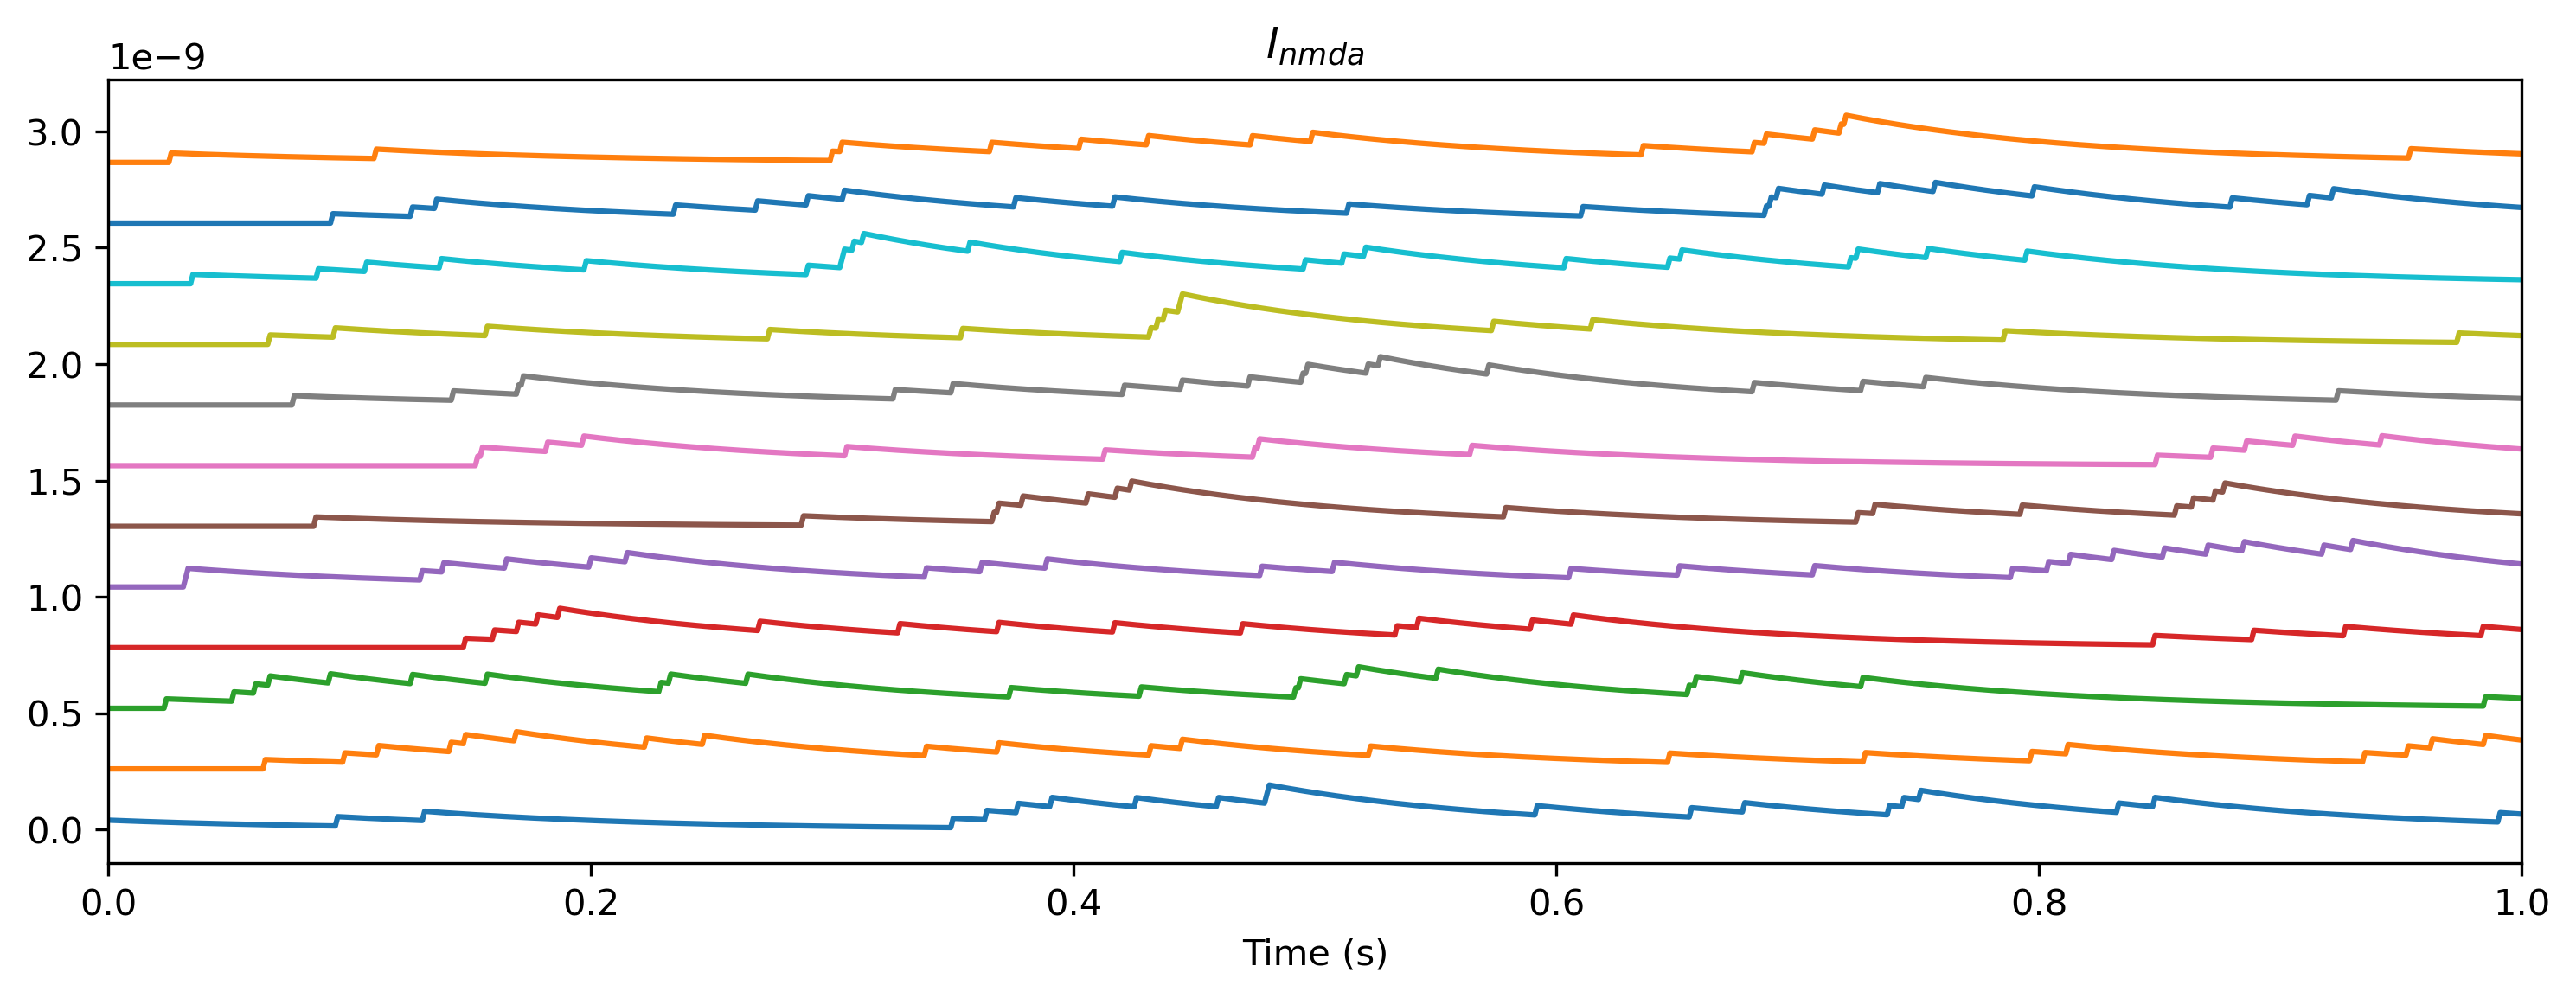

In [33]:
j_Inmda = plot_Isyn(j_record_dict["Inmda"], name="JIT $I_{nmda}$")

plt.figure()
Inmda  = plot_Isyn(record_dict["Inmda"], name="$I_{nmda}$")
np.testing.assert_array_equal(Inmda.times, j_Inmda.times)

In [34]:
def loss(params, mod_orig, input, target):
    mod_new = mod_orig.set_attributes(params)
    
    out, _, r_d = mod_new(input, record = True)
    
    return np.mean((out - target) ** 2)

In [35]:
p = modSE.parameters()
modSE.parameters()

{'Itau_mem': DeviceArray([1.13475175e-11, 1.13475175e-11, 1.13475175e-11,
              1.13475175e-11, 1.13475175e-11, 1.13475175e-11,
              1.13475175e-11, 1.13475175e-11, 1.13475175e-11,
              1.13475175e-11, 1.13475175e-11, 1.13475175e-11],            dtype=float32),
 'f_gain_mem': DeviceArray([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.], dtype=float32),
 'Itau_syn': DeviceArray([[1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11,
               1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11],
              [1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11,
               1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11],
              [1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11,
               1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11],
              [1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11,
               1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11],
              [1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11, 1.e-11,
               1.e-11, 1.e-1

In [36]:
loss(p, modSE, input_ts.raster(dt = dt), 10.)

DeviceArray(99.7435, dtype=float32)

In [37]:
vgf_loss = jax.value_and_grad(loss)

In [38]:
l, g = vgf_loss(p, modSE, input_ts.raster(dt = dt), 10.)

In [39]:
# Should not be all zeros, last two syn should be all zeros
g

{'Itau_mem': DeviceArray([-3.1716155e-08, -4.0410406e-08, -6.0883409e-08,
              -4.3168601e-08, -4.5140133e-08, -2.3510241e-08,
              -1.9556188e-08, -2.0143901e-08, -1.2457700e-08,
              -4.7222414e-08, -3.1038962e-08, -4.7313748e-08],            dtype=float32),
 'Itau_syn': DeviceArray([[-1.5411619e-08, -1.3043506e-08, -1.2935892e-08,
               -1.6721152e-08, -2.0514992e-08, -1.3437490e-08,
               -1.4253406e-08, -6.3475989e-09, -1.0037878e-08,
               -1.1017722e-08, -1.0789118e-08, -3.5727048e-08],
              [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
                0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
                0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
                0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
              [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
                0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
                0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
     

In [40]:
a = jax.grad(step_pwl)(1e-8, 1e-9, 5e-13)
b = jax.grad(step_pwl)(1e-10, 1e-9, 5e-13)
c = jax.grad(step_pwl)(1e-13, 1e-9, 5e-13)
print(a)
print(b)
print(c)

9.995e-10
9.995e-10
0.0


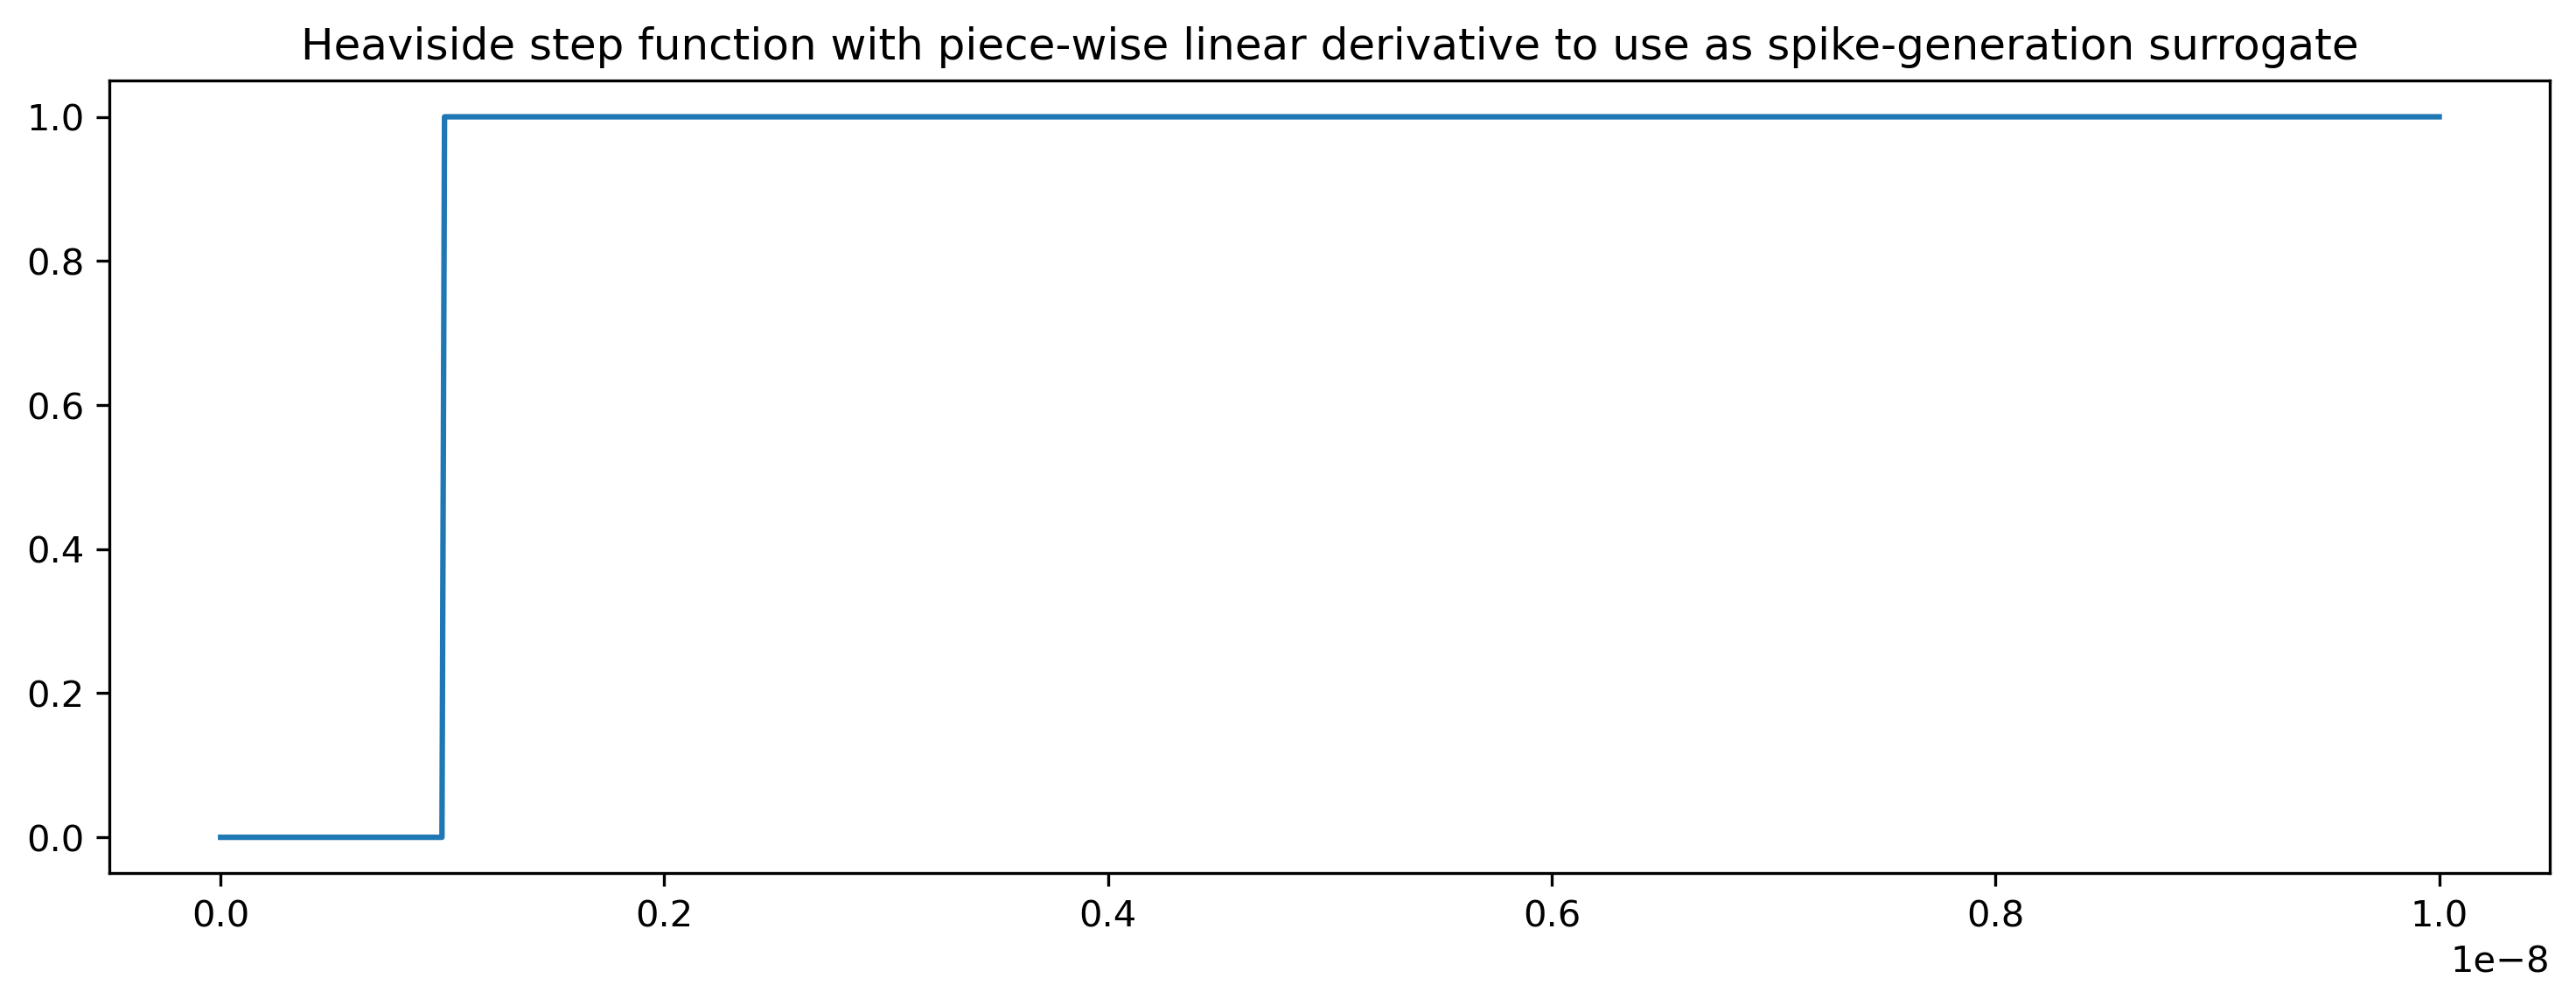

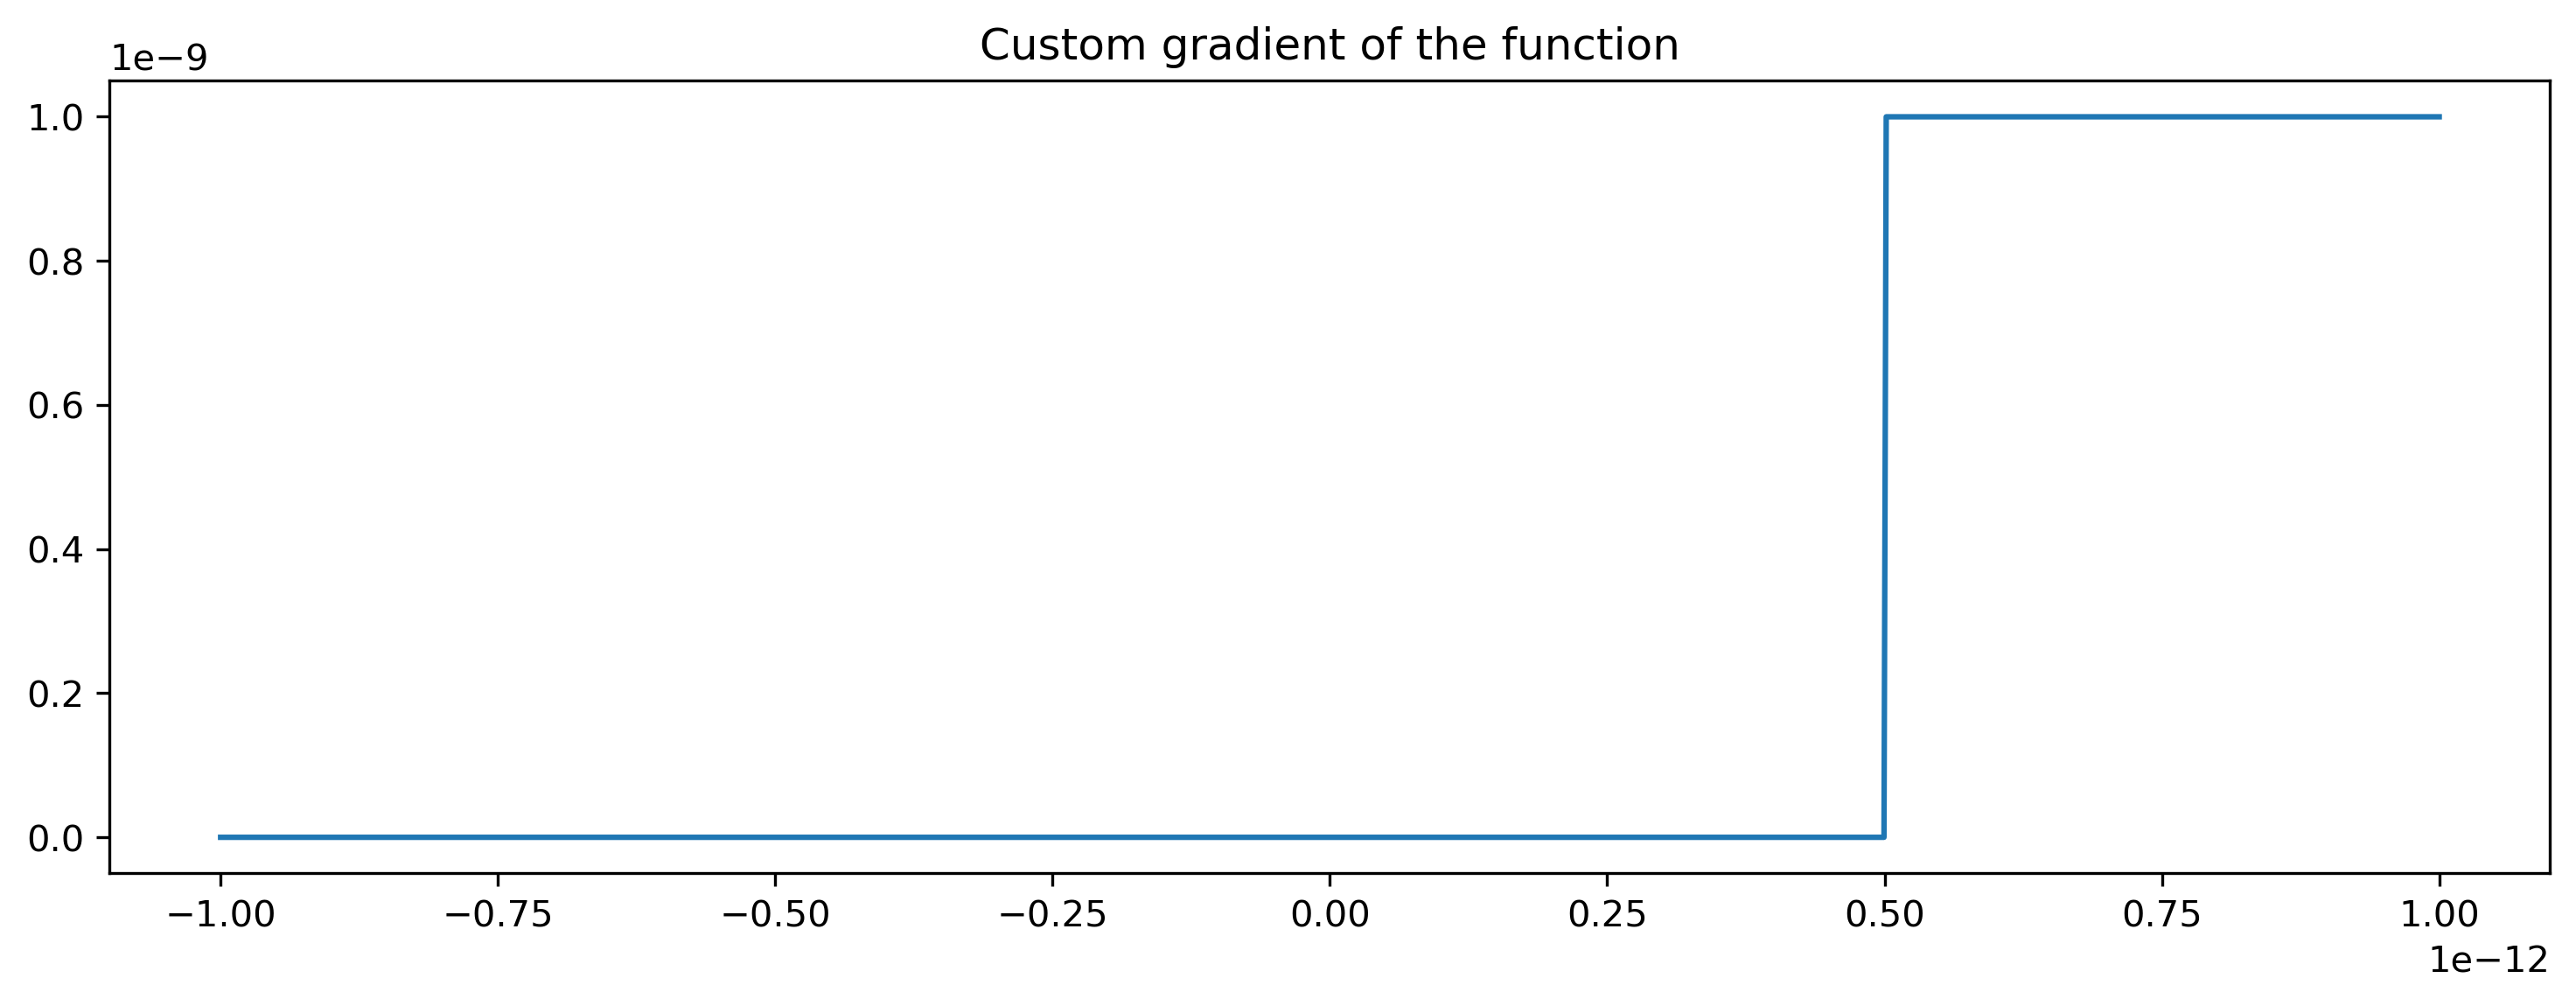

In [41]:
xs_func = jnp.logspace(start=-13, stop=-8, num=1000)
func = [step_pwl(x, modSE.Ispkthr[0], modSE.Ireset[0]) for x in xs_func]

plt.figure()
plt.title("Heaviside step function with piece-wise linear derivative to use as spike-generation surrogate")
plt.plot(xs_func, func)
plt.show()

xs_grad = jnp.linspace(-10e-13, 10e-13, 1000)
grad = [jax.grad(step_pwl)(x, modSE.Ispkthr[0], modSE.Ireset[0]) for x in xs_grad]

plt.figure()
plt.title("Custom gradient of the function")
plt.plot(xs_grad, grad)
plt.show()
